# An Investigation into the Irish Agriculture Sector

## Agriculture has always been a core pillar in the Irish economy. 

This analysis will dive deeper into how the value of agriculture in Ireland has changed over time, what regions are hotspots for profitable agriculture and what sectors make up the agri sector. AS well as that we will investigate how Ireland campares to its international competitors and make predictions about the future of Irish agriculture.

In [1]:
#!pip install plotly
#!pip install pandas geopandas matplotlib
#!pip install geopandas folium
#!pip install tabulate

In [107]:
#import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap
import geopandas as gpd
import plotly.express as px
import folium
from folium.features import GeoJsonTooltip
from folium import Choropleth
from IPython.display import display
from tabulate import tabulate
import hvplot.pandas
import holoviews as hv
from holoviews import opts
import dash
import plotly.express as px
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State
import dash_colorscales
import cufflinks as cf
import re
from scipy.stats import norm
import scipy.stats as stats

In [3]:
#dataset taken from CSO's Open Data Platform (Data.cso.ie, 2020)
agri_df = pd.read_csv("agri.csv")

In [4]:
#use .head() function to inspect df structure and contents of columns
agri_df.head()

,Statistic Label,Year,State,UNIT,VALUE
0,All Livestock,1990,State,Euro Million,2201.9
1,All Livestock,1991,State,Euro Million,2114.0
2,All Livestock,1992,State,Euro Million,2262.5
3,All Livestock,1993,State,Euro Million,2449.6
4,All Livestock,1994,State,Euro Million,2319.3


In [5]:
#inspect final rows to gain insight into Year range
agri_df.tail()

,Statistic Label,Year,State,UNIT,VALUE
1831,Entrepreneurial Income,2019,State,Euro Million,2458.745140
1832,Entrepreneurial Income,2020,State,Euro Million,2648.144262
1833,Entrepreneurial Income,2021,State,Euro Million,3114.530272
1834,Entrepreneurial Income,2022,State,Euro Million,4118.374159
1835,Entrepreneurial Income,2023,State,Euro Million,2340.050782


In [6]:
#confirm time range and inspect max and min values
agri_df.describe() 

,Year,VALUE
count,1836.000000,1770.000000
mean,2006.500000,970.555094
std,9.813381,1549.979880
min,1990.000000,-82.900000
25%,1998.000000,95.225000
50%,2006.500000,301.700567
75%,2015.000000,1306.519415
max,2023.000000,12893.450610


In [7]:
#inspect number of unique categories
agri_df.describe(include=object) 

,Statistic Label,State,UNIT
count,1836,1836,1836
unique,54,1,1
top,All Livestock,State,Euro Million
freq,34,1836,1836


In [8]:
#inspect size of dataset
agri_df.shape

(1836, 5)

In [9]:
#check for null values
agri_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  1836 non-null   object 
 1   Year             1836 non-null   int64  
 2   State            1836 non-null   object 
 3   UNIT             1836 non-null   object 
 4   VALUE            1770 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 71.8+ KB


In [10]:
#check what categories are in my dataset to help me decide how to filter categories
unique_categories = agri_df['Statistic Label'].unique()
print(unique_categories) 

['All Livestock' 'Livestock - Cattle' 'Livestock - Pig'
 'Livestock - Sheep' 'Livestock - Horses' 'Livestock - Poultry'
 'All Livestock Products' 'All Livestock Products - Milk'
 'All Livestock Products Other Products (excluding Milk)' 'All Crops'
 'All Cereals' 'Crops - Barley' 'Crops - Wheat' 'Crops - Oats'
 'Crops - Potatoes' 'Crops - Sugar Beet' 'Crops - Mushrooms'
 'Crops - Other Fresh Vegetables' 'Crops - Fresh Fruit' 'Crops - Turf'
 'Crops - Other Crops' 'Crops - Forage Plants'
 'Goods Output at Producer Prices' 'Contract Work' 'Subsidies on Products'
 'Taxes on Products' 'Subsidies less Taxes on Products'
 'Agricultural Output at Basic Prices' 'Intermediate Consumption'
 'Intermediate Consumption - Feeding Stuffs'
 'Intermediate Consumption - Fertilisers'
 'Intermediate Consumption - Financial Intermediation Services Indirect'
 'Intermediate Consumption - Seeds'
 'Intermediate Consumption - Energy and Lubricants'
 'Intermediate Consumption - Maintenance and Repairs'
 'Intermedi

# Data Preparation and manipulation of original dataset

Now that original dataframe has been explored using basic functions it is time to manipulate the columns and rows to make the data more suitable for this investigation and to focus on the areas I am concerned with

## Let's Focus on Ireland's 2 Biggest Agriculture Sectors: Livestock and Crops

In [11]:
#create a function to filter datasets
def filter_categories(data, categories):
    """
    Filter the DataFrame based on specified categories.

    Parameters:
    data (DataFrame): The DataFrame to filter.
    categories (list of str): The categories to filter by.

    Returns:
    DataFrame: A DataFrame filtered by the specified categories.
    """
    # Filtering the DataFrame for specified categories
    filtered_data = data[data['Statistic Label'].isin(categories)]
    return filtered_data

Weiss, S. (2024). Functions - Part 2. [Lecture]

In [12]:
 #after observing my dataset I've decided I want to narrow my study to livestock and crop production only, create a list of 'Statistic Labels' to filter
categories= [
  'All Livestock', 'Livestock - Cattle', 'Livestock - Pig',
    'Livestock - Sheep', 'Livestock - Horses', 'Livestock - Poultry',
    'All Livestock Products', 'All Livestock Products - Milk',
    'All Livestock Products Other Products (excluding Milk)', 'All Crops',
    'All Cereals', 'Crops - Barley', 'Crops - Wheat', 'Crops - Oats',
    'Crops - Potatoes', 'Crops - Sugar Beet', 'Crops - Mushrooms',
    'Crops - Other Fresh Vegetables', 'Crops - Fresh Fruit', 'Crops - Turf',
    'Crops - Other Crops', 'Crops - Forage Plants'
]

In [13]:
#apply function
filtered_agri = filter_categories(agri_df, categories)

In [14]:
#check how many rows I have left and if there are any null values remaining
filtered_agri.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  748 non-null    object 
 1   Year             748 non-null    int64  
 2   State            748 non-null    object 
 3   UNIT             748 non-null    object 
 4   VALUE            730 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 35.1+ KB


## Dealing with Missing Values

In [15]:
#view my missing values
missing_values_df = filtered_agri[filtered_agri['VALUE'].isnull()]
print(missing_values_df)

                    Statistic Label  Year  State          UNIT  VALUE
407                  Crops - Barley  2023  State  Euro Million    NaN
441                   Crops - Wheat  2023  State  Euro Million    NaN
475                    Crops - Oats  2023  State  Euro Million    NaN
509                Crops - Potatoes  2023  State  Euro Million    NaN
543              Crops - Sugar Beet  2023  State  Euro Million    NaN
577               Crops - Mushrooms  2023  State  Euro Million    NaN
611  Crops - Other Fresh Vegetables  2023  State  Euro Million    NaN
645             Crops - Fresh Fruit  2023  State  Euro Million    NaN
671                    Crops - Turf  2015  State  Euro Million    NaN
672                    Crops - Turf  2016  State  Euro Million    NaN
673                    Crops - Turf  2017  State  Euro Million    NaN
674                    Crops - Turf  2018  State  Euro Million    NaN
675                    Crops - Turf  2019  State  Euro Million    NaN
676                 

In [16]:
#it is observed that all the data on turf production is missing from 2015 to 2023, it would be difficult to accurately fill this data so I will remove this category
updated_df=filtered_agri[filtered_agri["Statistic Label"]!="Crops - Turf"]

In [17]:
#view missing values left
missing_values = updated_df[updated_df['VALUE'].isnull()]
print(missing_values)

                    Statistic Label  Year  State          UNIT  VALUE
407                  Crops - Barley  2023  State  Euro Million    NaN
441                   Crops - Wheat  2023  State  Euro Million    NaN
475                    Crops - Oats  2023  State  Euro Million    NaN
509                Crops - Potatoes  2023  State  Euro Million    NaN
543              Crops - Sugar Beet  2023  State  Euro Million    NaN
577               Crops - Mushrooms  2023  State  Euro Million    NaN
611  Crops - Other Fresh Vegetables  2023  State  Euro Million    NaN
645             Crops - Fresh Fruit  2023  State  Euro Million    NaN
713             Crops - Other Crops  2023  State  Euro Million    NaN


In [18]:
#create a list of the miss statistic labels
categories_with_missing_values = missing_values['Statistic Label'].unique()
print(categories_with_missing_values)

['Crops - Barley' 'Crops - Wheat' 'Crops - Oats' 'Crops - Potatoes'
 'Crops - Sugar Beet' 'Crops - Mushrooms' 'Crops - Other Fresh Vegetables'
 'Crops - Fresh Fruit' 'Crops - Other Crops']


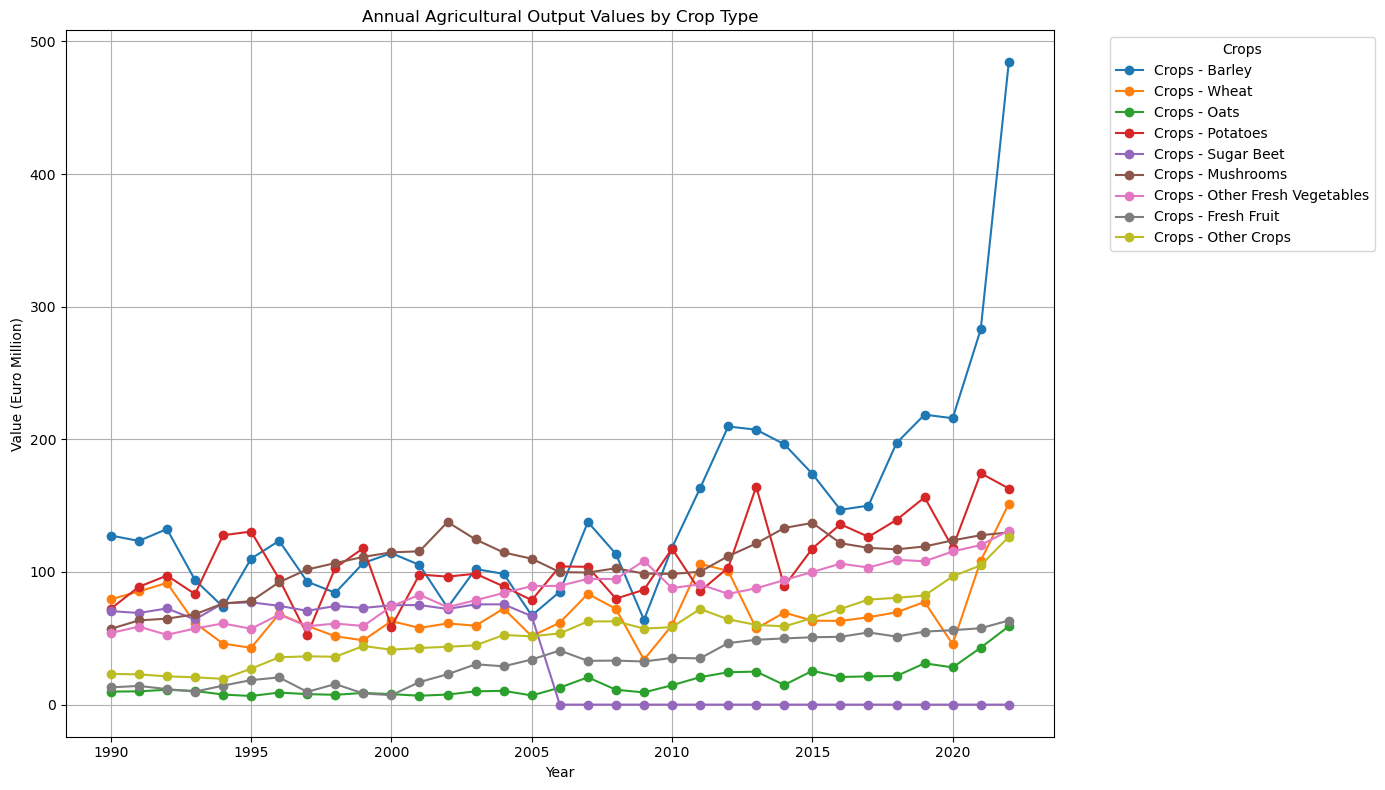

In [19]:
#visualising the categories with missing values to help determine how to replace these values
# Filter the data
filtered_data = updated_df[updated_df['Statistic Label'].isin(categories_with_missing_values)]

# Pivot the data for plotting
pivot_data = filtered_data.pivot(index='Year', columns='Statistic Label', values='VALUE')

# Plotting each crop
plt.figure(figsize=(14, 8))
for crop in categories_with_missing_values:
    plt.plot(pivot_data.index, pivot_data[crop], marker='o', label=crop)

plt.title('Annual Agricultural Output Values by Crop Type')
plt.xlabel('Year')
plt.ylabel('Value (Euro Million)')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


I can see that most of the categories fluctuated regularly during the timeframe except for barley and sugar beet, I could replace the consistent categories with mean values but need to look more into these 2 categories.

In [20]:
#calculate the means of normally distributed categories
means= updated_df[updated_df['Statistic Label'].apply(lambda x: x not in ['Crops - Barley', 'Crops - Sugar Beet'])]\
    .groupby('Statistic Label')['VALUE'].transform('mean')

In [21]:
#fill missing values with mean
updated_df.loc[updated_df['Statistic Label'].apply(lambda x: x not in ['Crops - Barley', 'Crops - Sugar Beet']), 'VALUE'] = \
    updated_df.loc[updated_df['Statistic Label'].apply(lambda x: x not in ['Crops - Barley', 'Crops - Sugar Beet']), 'VALUE'].fillna(means)

In [22]:
#check for remaining missing values
missing_values = updated_df[updated_df['VALUE'].isnull()]
missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 407 to 543
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  2 non-null      object 
 1   Year             2 non-null      int64  
 2   State            2 non-null      object 
 3   UNIT             2 non-null      object 
 4   VALUE            0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 96.0+ bytes


In [23]:
#inspecting each category seperately
categories = ['Crops - Sugar Beet']
filtered_df = filter_categories(updated_df, categories)
print(filtered_df)

        Statistic Label  Year  State          UNIT  VALUE
510  Crops - Sugar Beet  1990  State  Euro Million   70.5
511  Crops - Sugar Beet  1991  State  Euro Million   69.1
512  Crops - Sugar Beet  1992  State  Euro Million   72.5
513  Crops - Sugar Beet  1993  State  Euro Million   64.2
514  Crops - Sugar Beet  1994  State  Euro Million   76.4
515  Crops - Sugar Beet  1995  State  Euro Million   77.1
516  Crops - Sugar Beet  1996  State  Euro Million   74.5
517  Crops - Sugar Beet  1997  State  Euro Million   70.7
518  Crops - Sugar Beet  1998  State  Euro Million   74.4
519  Crops - Sugar Beet  1999  State  Euro Million   72.9
520  Crops - Sugar Beet  2000  State  Euro Million   74.9
521  Crops - Sugar Beet  2001  State  Euro Million   75.1
522  Crops - Sugar Beet  2002  State  Euro Million   72.1
523  Crops - Sugar Beet  2003  State  Euro Million   75.6
524  Crops - Sugar Beet  2004  State  Euro Million   75.6
525  Crops - Sugar Beet  2005  State  Euro Million   66.7
526  Crops - S

The first beet processing plant in the newly independent Ireland was opened in Carlow in 1926, followed by factories in Mallow, Thurles and Tuam. When Ireland joined the European Economic Community in 1973, the Irish sugar beet industry was impacted by EU quotas but it wasn’t actually until 2006 that all beet sugar production ceased in Ireland when the European Union offered incentives for countries whose industries weren’t as high performing as others to exit the sugar sector. McElwain, A. (2019). 
(McElwain, 2019)
Whatever happened to Irish sugar? [online] The Irish Times. Available at: https://www.irishtimes.com/life-and-style/food-and-drink/whatever-happened-to-irish-sugar-1.3886285.

In [24]:
#replace sugar beet NaN value with 0.0
updated_df.loc[updated_df['Statistic Label'] == 'Crops - Sugar Beet', 'VALUE'] = updated_df.loc[updated_df['Statistic Label'] == 'Crops - Sugar Beet', 'VALUE'].fillna(0.0)

In [25]:
#inspect Barlry during time period
categories = ['Crops - Barley']
filtered_df = filter_categories(updated_df, categories)
print(filtered_df)

    Statistic Label  Year  State          UNIT       VALUE
374  Crops - Barley  1990  State  Euro Million  127.500000
375  Crops - Barley  1991  State  Euro Million  123.400000
376  Crops - Barley  1992  State  Euro Million  132.400000
377  Crops - Barley  1993  State  Euro Million   94.000000
378  Crops - Barley  1994  State  Euro Million   73.700000
379  Crops - Barley  1995  State  Euro Million  110.100000
380  Crops - Barley  1996  State  Euro Million  123.500000
381  Crops - Barley  1997  State  Euro Million   92.700000
382  Crops - Barley  1998  State  Euro Million   84.300000
383  Crops - Barley  1999  State  Euro Million  106.800000
384  Crops - Barley  2000  State  Euro Million  114.200000
385  Crops - Barley  2001  State  Euro Million  105.300000
386  Crops - Barley  2002  State  Euro Million   73.100000
387  Crops - Barley  2003  State  Euro Million  102.200000
388  Crops - Barley  2004  State  Euro Million   98.600000
389  Crops - Barley  2005  State  Euro Million   67.2000

In [26]:
#2,015,700 tonnes at 205 euro per tonne in 2023
Barley_23 = (2015700*205)/1000000

In [27]:
#check value of barley
Barley_23 

413.2185

In [28]:
#impute calculated value
updated_df.loc[updated_df['Statistic Label'] == 'Crops - Barley', 'VALUE'] = updated_df.loc[updated_df['Statistic Label'] == 'Crops - Barley', 'VALUE'].fillna(Barley_23)

In [29]:
#check no null values left
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 747
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  714 non-null    object 
 1   Year             714 non-null    int64  
 2   State            714 non-null    object 
 3   UNIT             714 non-null    object 
 4   VALUE            714 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.5+ KB


pandas.pydata.org. (2024b). Working with missing data — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html.

In [30]:
#rank by value in euro millions
most_popular = updated_df.sort_values(by='VALUE', ascending=False)

In [31]:
most_popular.head()

,Statistic Label,Year,State,UNIT,VALUE
236,All Livestock Products,2022,State,Euro Million,5125.862974
270,All Livestock Products - Milk,2022,State,Euro Million,5026.208170
33,All Livestock,2023,State,Euro Million,4570.987090
32,All Livestock,2022,State,Euro Million,4543.251707
31,All Livestock,2021,State,Euro Million,3992.818325


In [32]:
most_popular.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 236 to 534
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  714 non-null    object 
 1   Year             714 non-null    int64  
 2   State            714 non-null    object 
 3   UNIT             714 non-null    object 
 4   VALUE            714 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.5+ KB


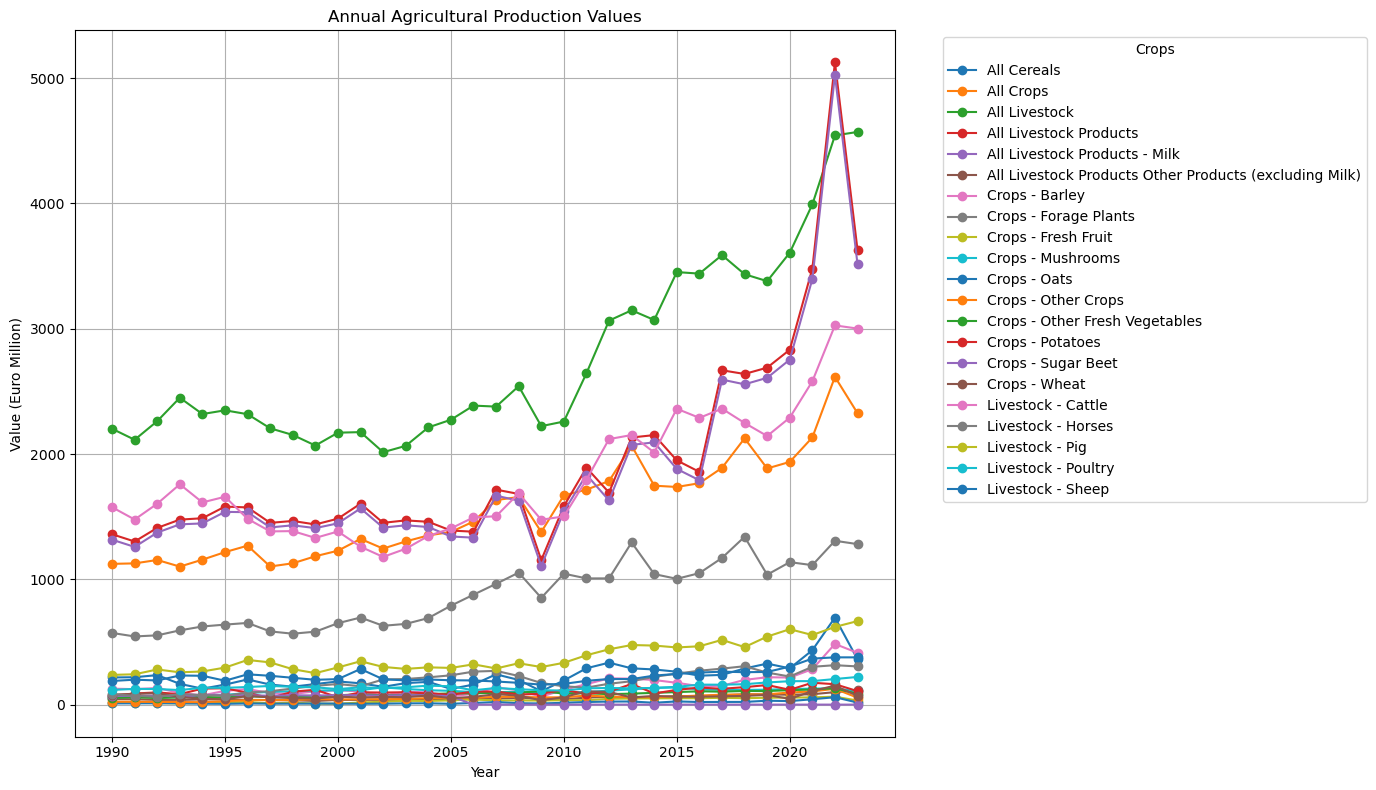

In [33]:
# Pivot the data for plotting
pivot_data = most_popular.pivot(index='Year', columns='Statistic Label', values='VALUE')

# Plotting each crop
plt.figure(figsize=(14, 8))
categories = pivot_data.columns  # Ensure you're plotting all available categories

for sector in categories:
    if sector in pivot_data.columns:  # Check if the sector is actually present
        plt.plot(pivot_data.index, pivot_data[sector], marker='o', label=sector)

plt.title('Annual Agricultural Production Values')
plt.xlabel('Year')
plt.ylabel('Value (Euro Million)')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# CPI values for Ireland from 1990 to 2023 (CSO office)
cpi_values = {
    1990: 52.6, 1991: 55.1, 1992: 56.9, 1993: 58.6, 1994: 59.5,
    1995: 60.5, 1996: 61.8, 1997: 63.6, 1998: 64.9, 1999: 65.5,
    2000: 67.3, 2001: 69.5, 2002: 70.8, 2003: 72.2, 2004: 74.2,
    2005: 76.4, 2006: 78.7, 2007: 81.1, 2008: 83.4, 2009: 82.5,
    2010: 82.2, 2011: 84.5, 2012: 85.1, 2013: 85.4, 2014: 85.7,
    2015: 85.5, 2016: 85.8, 2017: 86.8, 2018: 87.7, 2019: 88.6,
    2020: 89.2, 2021: 91.5, 2022: 97.0, 2023: 100.0
}

# Convert the dataset values to a common year (e.g., 2023)
base_year = 2023
base_cpi = cpi_values[base_year]

# Adjust the values for inflation
def adjust_for_inflation(row):
    year = row['Year']
    nominal_value = row['VALUE']
    cpi_year = cpi_values.get(year, base_cpi)
    adjusted_value = nominal_value * (base_cpi / cpi_year)
    return adjusted_value

# Apply the inflation adjustment and create a new column "Adjusted Value"
most_popular['Adjusted Value'] = most_popular.apply(adjust_for_inflation, axis=1)

# Display the first few rows 
most_popular.head()

,Statistic Label,Year,State,UNIT,VALUE,Adjusted Value
236,All Livestock Products,2022,State,Euro Million,5125.862974,5284.394819
270,All Livestock Products - Milk,2022,State,Euro Million,5026.208170,5181.657907
33,All Livestock,2023,State,Euro Million,4570.987090,4570.987090
32,All Livestock,2022,State,Euro Million,4543.251707,4683.764646
31,All Livestock,2021,State,Euro Million,3992.818325,4363.735874


In [35]:
most_popular.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 236 to 534
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  714 non-null    object 
 1   Year             714 non-null    int64  
 2   State            714 non-null    object 
 3   UNIT             714 non-null    object 
 4   VALUE            714 non-null    float64
 5   Adjusted Value   714 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 39.0+ KB


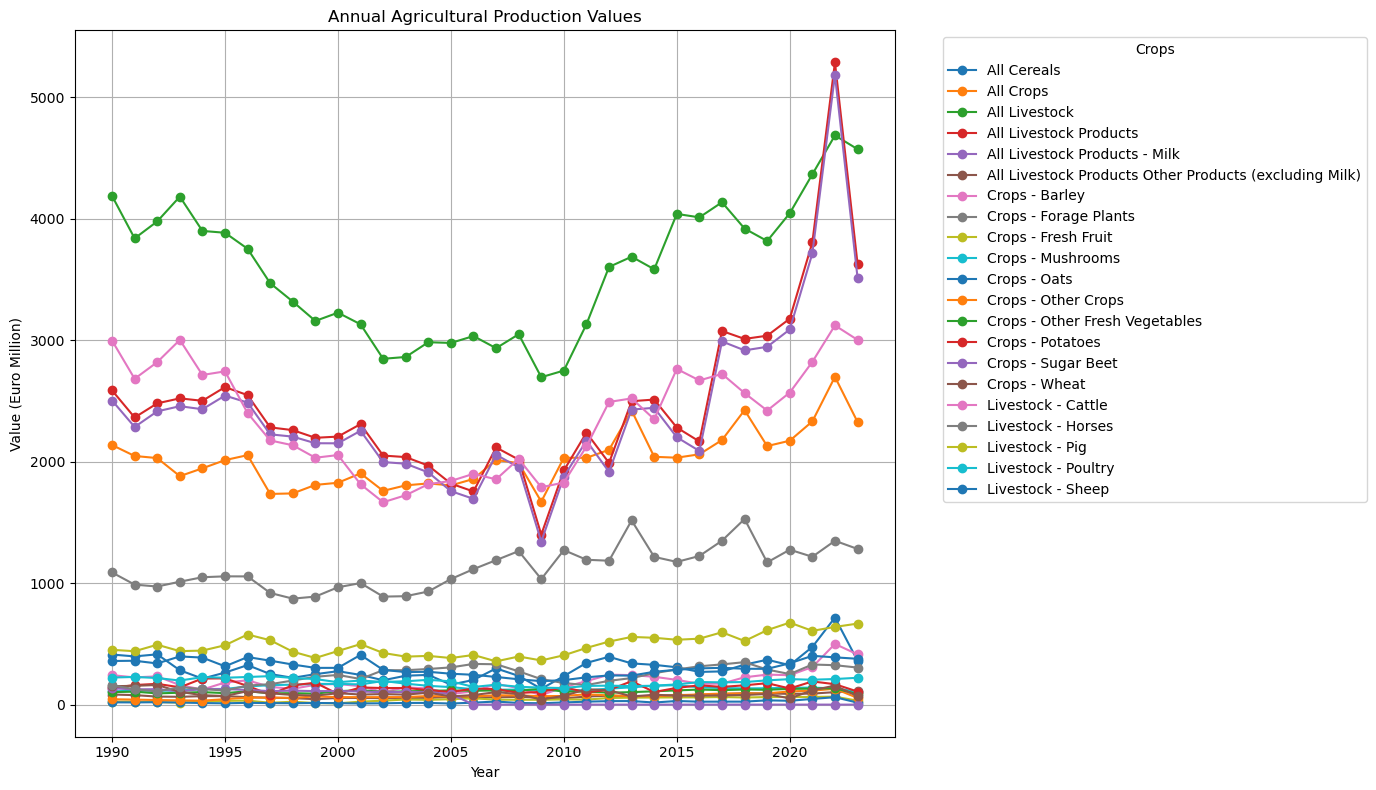

In [36]:
# Pivot the data for plotting and check value conversion succesful
pivot_data = most_popular.pivot(index='Year', columns='Statistic Label', values='Adjusted Value')

# Plotting each crop
plt.figure(figsize=(14, 8))
categories = pivot_data.columns  

for sector in categories:
    if sector in pivot_data.columns:  
        plt.plot(pivot_data.index, pivot_data[sector], marker='o', label=sector)

plt.title('Annual Agricultural Production Values')
plt.xlabel('Year')
plt.ylabel('Value (Euro Million)')
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
categories = most_popular.groupby('Statistic Label')['Adjusted Value'].sum().reset_index()

In [38]:
#rank highest to lowest
categories.sort_values(by="Adjusted Value", ascending = False)

,Statistic Label,Adjusted Value
2,All Livestock,121704.278181
3,All Livestock Products,84630.057347
4,All Livestock Products - Milk,82250.661227
16,Livestock - Cattle,80118.346502
1,All Crops,68785.630764
7,Crops - Forage Plants,38150.798062
18,Livestock - Pig,16643.071502
20,Livestock - Sheep,10365.807680
0,All Cereals,10326.403084
17,Livestock - Horses,8099.408585


In [39]:
pivot_data.head()

Statistic Label,All Cereals,All Crops,All Livestock,All Livestock Products,All Livestock Products - Milk,All Livestock Products Other Products (excluding Milk),Crops - Barley,Crops - Forage Plants,Crops - Fresh Fruit,Crops - Mushrooms,...,Crops - Other Crops,Crops - Other Fresh Vegetables,Crops - Potatoes,Crops - Sugar Beet,Crops - Wheat,Livestock - Cattle,Livestock - Horses,Livestock - Pig,Livestock - Poultry,Livestock - Sheep
Year,,,,,,,,,,,,,,,,,,,,,
1990,411.977186,2135.931559,4186.121673,2585.551331,2502.471483,83.079848,242.395437,1087.452471,24.714829,108.555133,...,44.106464,102.661597,137.452471,134.030418,150.950570,2995.437262,158.174905,450.950570,222.623574,358.935361
1991,396.733212,2045.916515,3836.660617,2362.794918,2284.754991,78.039927,223.956443,987.477314,25.589837,115.245009,...,41.379310,106.715064,161.161525,125.408348,154.809437,2681.306715,127.404719,439.382940,227.767695,360.980036
1992,413.708260,2028.822496,3976.274165,2479.261863,2413.181019,66.080844,232.688928,971.704745,20.562390,113.884007,...,37.434095,92.442882,171.001757,127.416520,161.335677,2818.101933,107.908612,492.794376,218.804921,338.840070
1993,282.764505,1880.034130,4180.204778,2519.965870,2455.631399,64.334471,160.409556,1011.433447,16.723549,116.211604,...,35.153584,97.952218,142.320819,109.556314,104.948805,3001.194539,144.197952,440.102389,197.952218,396.587031
1994,213.949580,1944.537815,3897.983193,2500.168067,2430.588235,69.579832,123.865546,1048.235294,24.033613,128.235294,...,32.605042,102.857143,214.621849,128.403361,77.310924,2712.605042,127.563025,444.537815,226.218487,386.890756


## Inspecting Total Trends over Time

In [40]:
#Group data by total per year
aggregated_data = most_popular.groupby('Year')['Adjusted Value'].sum().reset_index()

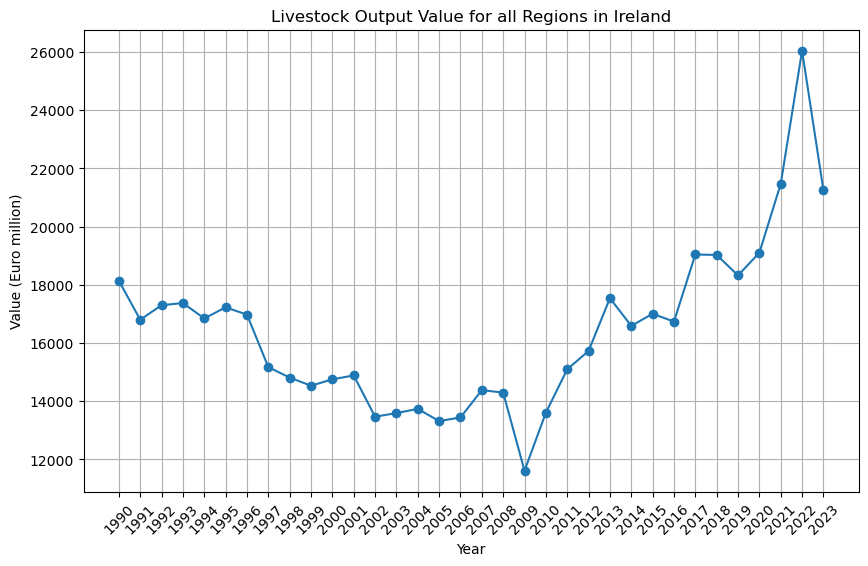

In [41]:
# Ensure that 'Year' is numerical for plotting
aggregated_data['Year'] = pd.to_numeric(aggregated_data['Year'], errors='coerce')

# Plot total visitors per year
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data["Year"], aggregated_data['Adjusted Value'], marker='o', linestyle='-')
plt.title('Livestock Output Value for all Regions in Ireland')

# Label axes
plt.xlabel('Year')
plt.ylabel('Value (Euro million)')

# Set x-ticks to be the years, converting Year to string for display purposes
plt.xticks(ticks=aggregated_data["Year"], labels=aggregated_data["Year"].astype(str), rotation=45)

# Include grid for easy reading of values
plt.grid(True)

# Show graph
plt.show()

In [42]:
def calculate_percentage_increase(visitors_df, year1, year2):
    # Check year1 < year2

    # Get a list of all unique countries
    countries = visitors_df['Country'].unique()

    for country_name in countries:
        # Filter DataFrame for year and countries
        selected_data = visitors_df[(visitors_df['Country'] == country_name) & 
                                    (visitors_df['Year'].isin([year1, year2]))]

        # Aggregate visitors by year for the selected country
        visitors_by_year = selected_data.groupby('Year')['Visitors'].sum()

        # Calculate visitors for each year
        visitors_year1 = visitors_by_year.get(year1, 0)
        visitors_year2 = visitors_by_year.get(year2, 0)

        # Calculate percentage increase
        percentage_increase = ((visitors_year2 - visitors_year1) / visitors_year1) * 100

        # Display the result
        print(f"Visitors from {country_name} increased by {percentage_increase:.2f}% from {year1} to {year2}.")


Weiss, S. (2024). Functions - Part 2. [Lecture] , GeeksforGeeks. (2018). Python Functions. [online] Available at: https://www.geeksforgeeks.org/python-functions/.

2009 - recession

In [43]:
#create a function to highlight the highest and lowest value in a table
def highlight_min_max(s):
    '''
    Highlight the minimum values in red and maximum values in green.
    '''
    temp_s = s.drop('Total', errors='ignore')
    is_min = s == s.min()
    is_max = s == s.max()
    return ['background-color: red' if v else 'background-color: green' if w else '' 
            for v, w in zip(is_min, is_max)]

In [44]:
most_popular.head()

,Statistic Label,Year,State,UNIT,VALUE,Adjusted Value
236,All Livestock Products,2022,State,Euro Million,5125.862974,5284.394819
270,All Livestock Products - Milk,2022,State,Euro Million,5026.208170,5181.657907
33,All Livestock,2023,State,Euro Million,4570.987090,4570.987090
32,All Livestock,2022,State,Euro Million,4543.251707,4683.764646
31,All Livestock,2021,State,Euro Million,3992.818325,4363.735874


In [45]:

# Group total visitors by sector
total_value = most_popular.groupby(['Year', 'Statistic Label'])['Adjusted Value'].sum().unstack()
total_value['Total'] = total_value.sum(axis=1)



# Apply function across each column
styled = total_value.style.apply(highlight_min_max, axis=0).format("{:,.0f}")

# Display the styled DataFrame
styled

Statistic Label,All Cereals,All Crops,All Livestock,All Livestock Products,All Livestock Products - Milk,All Livestock Products Other Products (excluding Milk),Crops - Barley,Crops - Forage Plants,Crops - Fresh Fruit,Crops - Mushrooms,Crops - Oats,Crops - Other Crops,Crops - Other Fresh Vegetables,Crops - Potatoes,Crops - Sugar Beet,Crops - Wheat,Livestock - Cattle,Livestock - Horses,Livestock - Pig,Livestock - Poultry,Livestock - Sheep,Total
Year,,,,,,,,,,,,,,,,,,,,,,
1990,412,"2,136","4,186","2,586","2,502",83,242,"1,087",25,109,19,44,103,137,134,151,"2,995",158,451,223,359,"18,142"
1991,397,"2,046","3,837","2,363","2,285",78,224,987,26,115,18,41,107,161,125,155,"2,681",127,439,228,361,"16,802"
1992,414,"2,029","3,976","2,479","2,413",66,233,972,21,114,20,37,92,171,127,161,"2,818",108,493,219,339,"17,302"
1993,283,"1,880","4,180","2,520","2,456",64,160,"1,011",17,116,18,35,98,142,110,105,"3,001",144,440,198,397,"17,375"
1994,214,"1,945","3,898","2,500","2,431",70,124,"1,048",24,128,13,33,103,215,128,77,"2,713",128,445,226,387,"16,848"
1995,263,"2,012","3,883","2,613","2,543",70,182,"1,056",31,129,11,45,95,216,127,71,"2,742",116,488,221,315,"17,228"
1996,325,"2,053","3,751","2,547","2,485",61,200,"1,055",33,149,15,58,110,153,121,111,"2,399",157,577,227,391,"16,978"
1997,252,"1,734","3,468","2,281","2,224",57,146,919,15,160,12,57,93,83,111,93,"2,174",168,530,234,362,"15,173"
1998,220,"1,738","3,317","2,259","2,205",53,130,872,24,164,11,56,94,159,115,79,"2,134",198,435,219,330,"14,813"


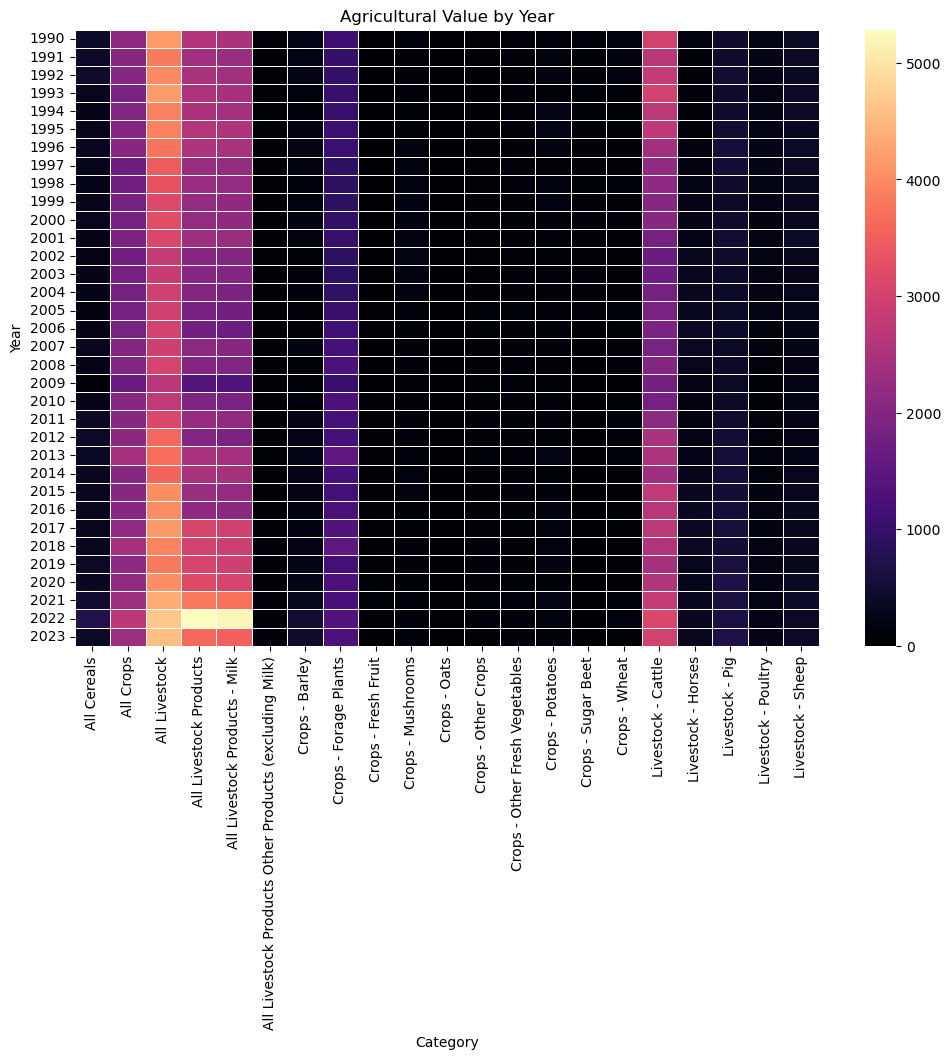

In [46]:
# Pivot the DataFrame to create a heatmap to visualise the change in value over time
heatmap_data = most_popular.pivot_table(index='Year', columns='Statistic Label', values='Adjusted Value', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='magma', annot=False, fmt='d', linewidths=.5)
plt.title('Agricultural Value by Year')
plt.xlabel('Category')
plt.ylabel('Year')
plt.show()

seaborn.pydata.org. (2012). seaborn.heatmap — seaborn 0.10.1 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.heatmap.html.

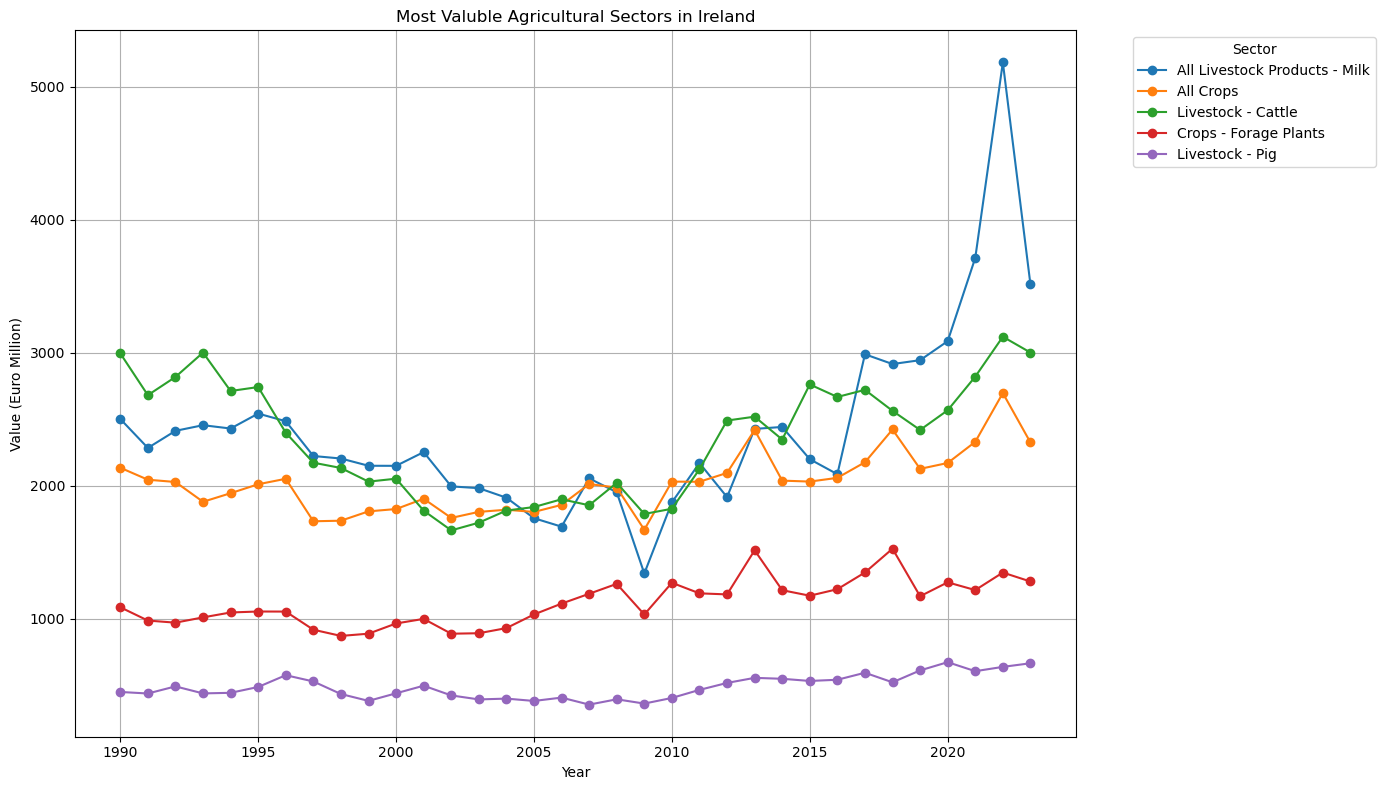

In [47]:
# Filter data for the specific categories
categories = ['All Livestock Products - Milk', 'All Crops', 'Livestock - Cattle', 'Crops - Forage Plants', 'Livestock - Pig']

# Filter the data
filtered_data = filter_categories(most_popular, categories)

# Pivot the data for plotting
pivot_data = filtered_data.pivot(index='Year', columns='Statistic Label', values='Adjusted Value')

# Plotting each crop
plt.figure(figsize=(14, 8))
for crop in categories:
    plt.plot(pivot_data.index, pivot_data[crop], marker='o', label=crop)

plt.title('Most Valuble Agricultural Sectors in Ireland')
plt.xlabel('Year')
plt.ylabel('Value (Euro Million)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



# Descriptive Statistics

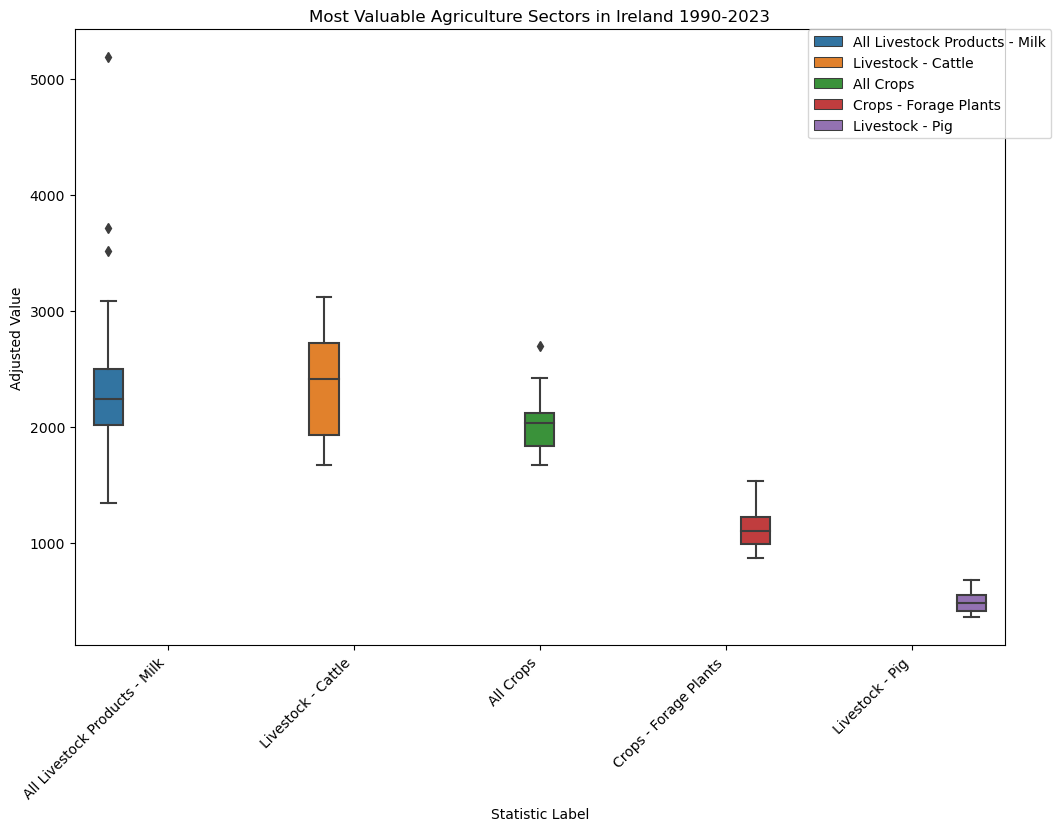

In [48]:
#create a boxplot to observe data spread
plt.figure(figsize=(12, 8))  

#assign data values
ax= sns.boxplot(x='Statistic Label', y='Adjusted Value', data=filtered_data, hue='Statistic Label')

#label Graph
plt.title('Most Valuable Agriculture Sectors in Ireland 1990-2023')

#rotate axis 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

#insert legend
plt.legend(title='Sector', fontsize='x-small', title_fontsize='small')


plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)


plt.show()

In [49]:
#Calculate IQR for aggregated agri value
Q1 = aggregated_data['Adjusted Value'].quantile(0.25)
Q3 = aggregated_data['Adjusted Value'].quantile(0.75)
IQR = Q3 - Q1

#calculate upper and lower band
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR

#show results
print(Q1, Q3, IQR)

#filter dataframe for outliers
year_outliers = aggregated_data[(aggregated_data['Adjusted Value'] < lower_bound) | (aggregated_data['Adjusted Value'] > upper_bound)]

14420.799361828296 17501.57160441528 3080.7722425869833


In [50]:
print(year_outliers)

    Year  Adjusted Value
32  2022    26046.705127


why did agricultural value spike in 2022?

# Remove my Outlier Year

In [51]:
#Creating new data set without 2022
no_outliers_df=most_popular[most_popular["Year"]!=2022]

In [52]:
#check updated rows and column count
no_outliers_df.shape

(693, 6)

In [53]:
# Filter data for the specific categories
categories = ['All Livestock Products - Milk', 'All Crops', 'Livestock - Cattle', 'Crops - Forage Plants', 'Livestock - Pig']

# Filter the data
filtered_outliers_df = filter_categories(no_outliers_df, categories)


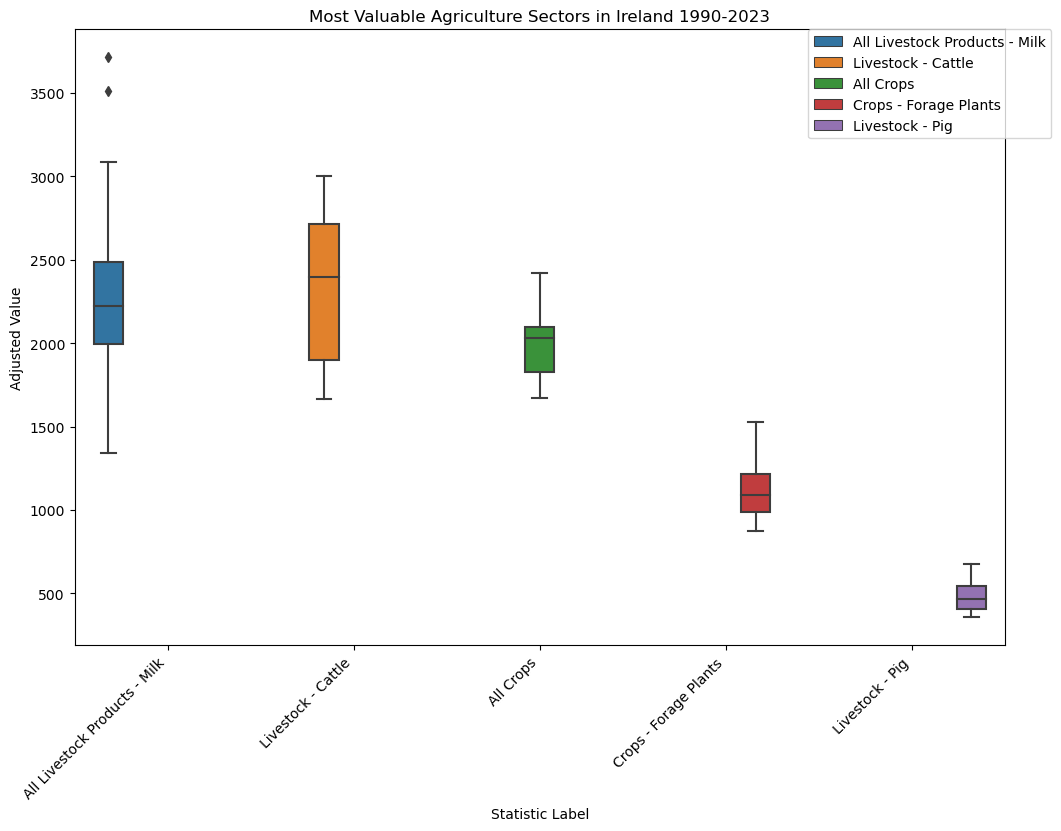

In [54]:
#create a boxplot to observe data spread
plt.figure(figsize=(12, 8))  

#assign data values
ax= sns.boxplot(x='Statistic Label', y='Adjusted Value', data=filtered_outliers_df, hue='Statistic Label')

#label Graph
plt.title('Most Valuable Agriculture Sectors in Ireland 1990-2023')

#rotate axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

#insert legend
plt.legend(title='Sector', fontsize='x-small', title_fontsize='small')


plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)


plt.show()

In [55]:
#inspect statistical properties
no_outliers_df.describe()

,Year,VALUE,Adjusted Value
count,693.000000,693.000000,693.000000
mean,2006.030303,584.599546,769.466622
std,9.581138,835.634265,1063.883073
min,1990.000000,0.000000,0.000000
25%,1998.000000,67.900000,92.871700
50%,2006.000000,138.700000,197.952218
75%,2014.000000,1045.200000,1216.577482
max,2023.000000,4570.987090,4570.987090


In [56]:
most_popular.describe()

,Year,VALUE,Adjusted Value
count,714.000000,714.000000,714.000000
mean,2006.500000,602.791022,783.315230
std,9.817586,879.890771,1093.515513
min,1990.000000,0.000000,0.000000
25%,1998.000000,68.325000,93.449844
50%,2006.500000,142.050000,198.217291
75%,2015.000000,1048.350000,1221.452063
max,2023.000000,5125.862974,5284.394819


In [114]:
no_outliers_df.to_csv("MLdata.csv",index=False)

In [57]:
# Filter the data
filtered_no_outliers_df = filter_categories(no_outliers_df, categories)

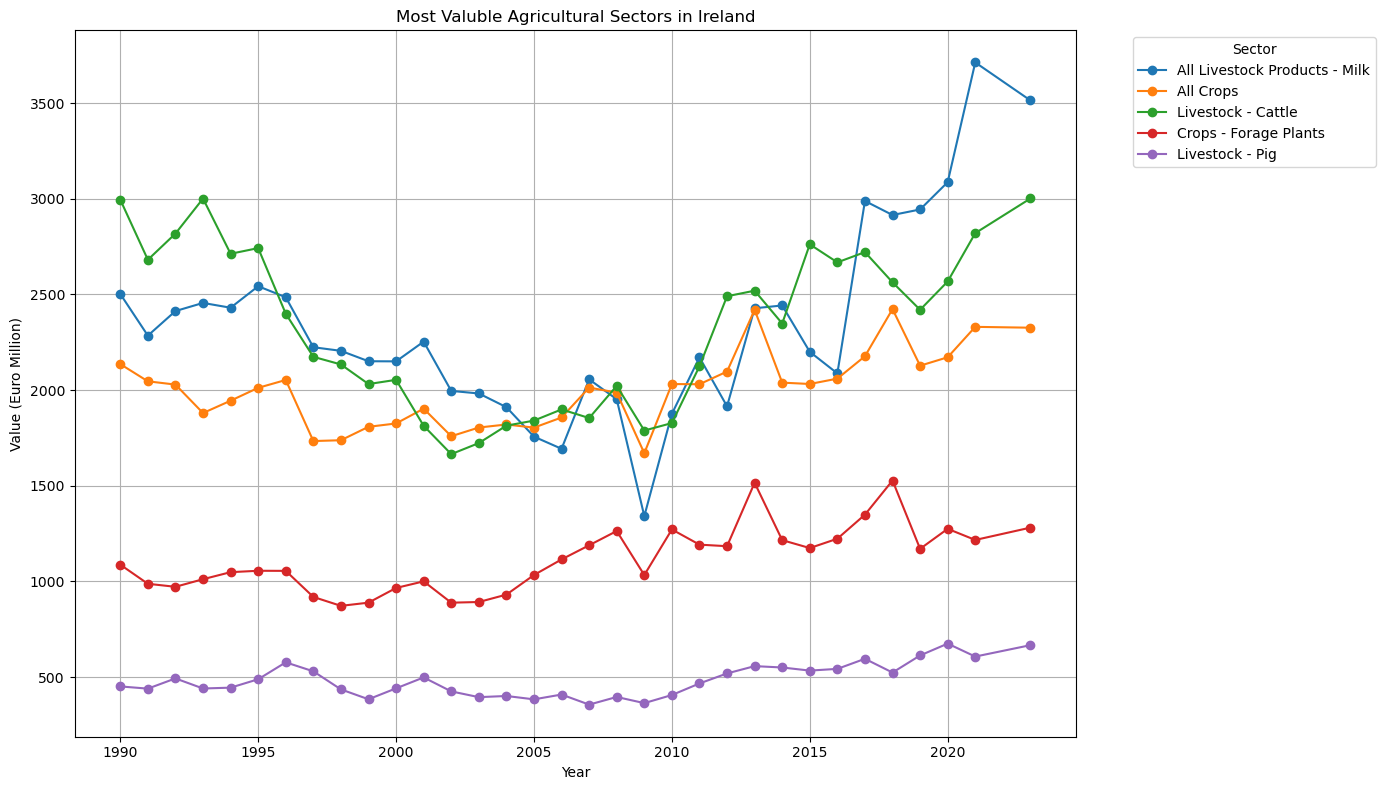

In [58]:
# Pivot the data for plotting
pivot_data = filtered_no_outliers_df.pivot(index='Year', columns='Statistic Label', values='Adjusted Value')

# Plotting each crop
plt.figure(figsize=(14, 8))
for crop in categories:
    plt.plot(pivot_data.index, pivot_data[crop], marker='o', label=crop)

plt.title('Most Valuble Agricultural Sectors in Ireland')
plt.xlabel('Year')
plt.ylabel('Value (Euro Million)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
def calculate_percentage_increases(no_outliers_df):
    # Get user input for the two years
    year1 = int(input("Enter the first year: "))
    year2 = int(input("Enter the second year: "))
    
    # Filter data for the selected years
    data_year1 = no_outliers_df[(no_outliers_df['Year'] == year1)& (no_outliers_df['Adjusted Value'] != 0.0)]
    data_year2 = no_outliers_df[(no_outliers_df['Year'] == year2)& (no_outliers_df['Adjusted Value'] != 0.0)]
    
    # Check if both years are present in the data
    if data_year1.empty or data_year2.empty:
        print("One or both of the years are not available in the data.")
        return
    
    # Calculate percentage increase for each Statistic Label
    percentage_increases = []
    labels = no_outliers_df['Statistic Label'].unique()
    for label in labels:
        value1 = data_year1[data_year1['Statistic Label'] == label]['Adjusted Value']
        value2 = data_year2[data_year2['Statistic Label'] == label]['Adjusted Value']
        
        if not value1.empty and not value2.empty:
            value1 = value1.values[0]
            value2 = value2.values[0]
            percentage_increase = ((value2 - value1) / value1) * 100
            percentage_increases.append((label, percentage_increase))
    
    # Sort results from biggest to smallest percentage increase
    percentage_increases.sort(key=lambda x: x[1], reverse=True)
    
    # Create a DataFrame for displaying results
    results_df = pd.DataFrame(percentage_increases, columns=['Statistic Label', 'Percentage Increase'])
    
    # Display the results using tabulate for better formatting
    print("\nPercentage increases from {} to {}:".format(year1, year2))
    print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False, floatfmt=".2f"))


askPython. (2021). Python tabulate module: How to Easily Create Tables in Python? - AskPython. [online] Available at: https://www.askpython.com/python-modules/tabulate-tables-in-python.

In [60]:
# Run the function
calculate_percentage_increases(most_popular)

Enter the first year: 2004
Enter the second year: 2010

Percentage increases from 2004 to 2010:
+--------------------------------------------------------+-----------------------+
| Statistic Label                                        |   Percentage Increase |
+========================================================+=======================+
| Crops - Forage Plants                                  |                 36.60 |
+--------------------------------------------------------+-----------------------+
| Crops - Oats                                           |                 26.72 |
+--------------------------------------------------------+-----------------------+
| Crops - Potatoes                                       |                 19.14 |
+--------------------------------------------------------+-----------------------+
| All Crops                                              |                 11.61 |
+--------------------------------------------------------+----------------

In [61]:
aggregated_data.median()

Year               2006.500000
Adjusted Value    16664.680011
dtype: float64

## Calculating the Mean and Median

In [62]:

# Calculate mean and median, and combine results
combined_stats = no_outliers_df.groupby('Statistic Label')['Adjusted Value'].agg(['mean', 'median']).reset_index()

# Rename columns
combined_stats.columns = ['Statistic Label', 'Mean Value', 'Median Value']

# Create style function to format the DataFrame
def style_specific_columns(df):
    return df.style.format({
        'Mean Value': "{:.2f}",  # Format mean with two decimal places
        'Median Value': "{:.2f}"  # Format median with two decimal places
    }).set_properties(**{
        'text-align': 'right'
    }).set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'left')]
    }]).set_caption("Summary Statistics: Mean and Median Values")  # Adding a caption

# Apply the function
styled_df = style_specific_columns(combined_stats)

# Display 
styled_df

,Statistic Label,Mean Value,Median Value
0,All Cereals,291.22,275.04
1,All Crops,2002.68,2028.82
2,All Livestock,3546.08,3601.65
3,All Livestock Products,2404.41,2281.29
4,All Livestock Products - Milk,2335.42,2224.06
5,All Livestock Products Other Products (excluding Milk),68.98,66.08
6,Crops - Barley,185.49,171.21
7,Crops - Forage Plants,1115.23,1087.45
8,Crops - Fresh Fruit,39.59,39.81
9,Crops - Mushrooms,139.65,136.15


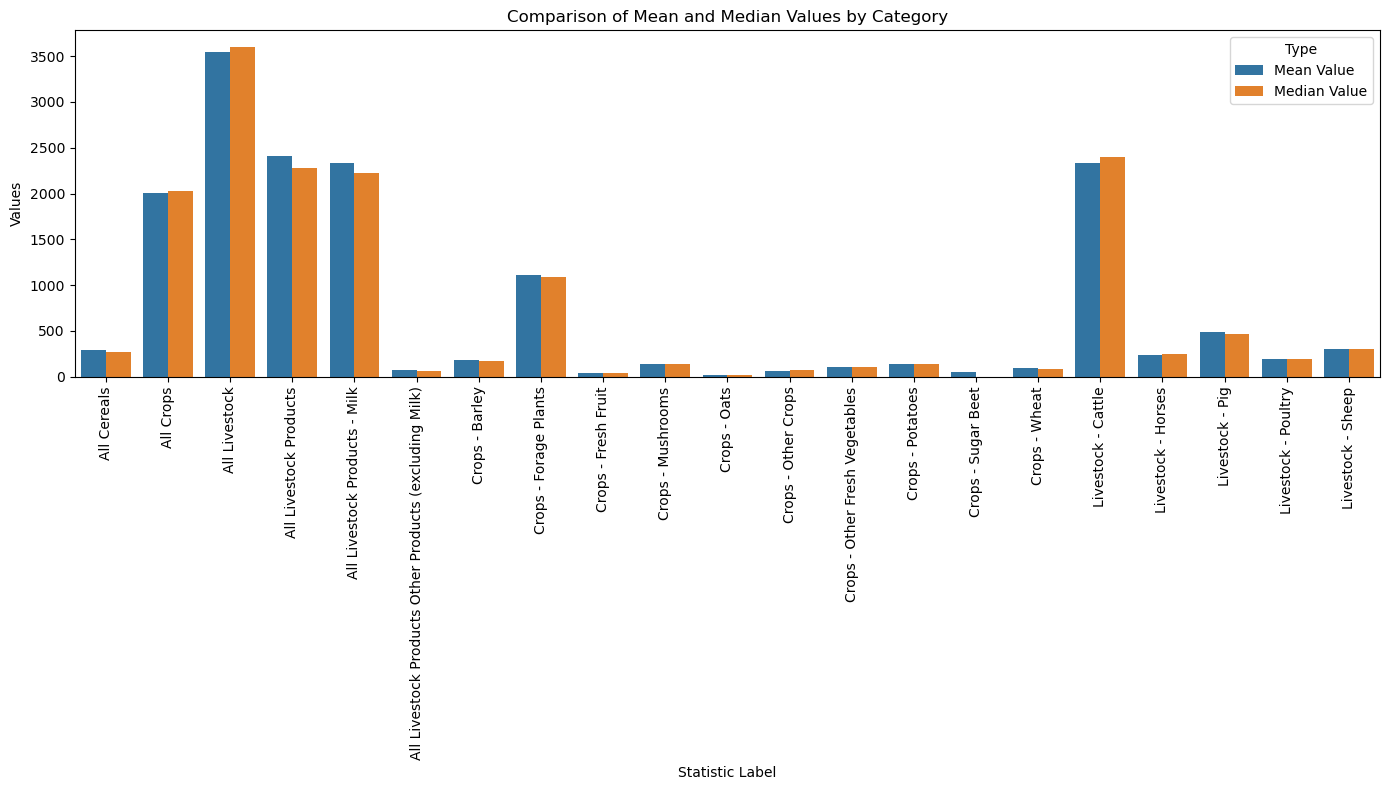

In [63]:
# Melt the dataframe to make it suitable for graphing
styled_df_melted = combined_stats.melt(id_vars='Statistic Label', var_name='Type', value_name='Value')

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=styled_df_melted, x='Statistic Label', y='Value', hue='Type')
plt.xticks(rotation=90)
plt.title('Comparison of Mean and Median Values by Category')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [64]:
styled_df_melted.head()

,Statistic Label,Type,Value
0,All Cereals,Mean Value,291.220183
1,All Crops,Mean Value,2002.682006
2,All Livestock,Mean Value,3546.076168
3,All Livestock Products,Mean Value,2404.414016
4,All Livestock Products - Milk,Mean Value,2335.424343


In [65]:
#group by total for each sector
df = no_outliers_df.groupby('Statistic Label')['Adjusted Value'].sum().reset_index()

In [66]:
df.head()

,Statistic Label,Adjusted Value
0,All Cereals,9610.266026
1,All Crops,66088.506195
2,All Livestock,117020.513535
3,All Livestock Products,79345.662528
4,All Livestock Products - Milk,77069.003320


  Statistic Label  Adjusted Value
1       All Crops    66088.506195
2   All Livestock   117020.513535


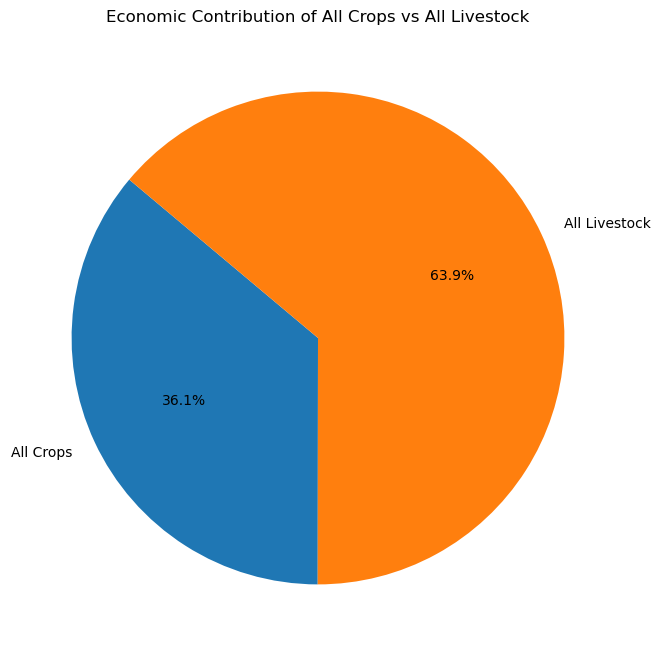

In [67]:
# Filter data to include only 'All Crops' and 'All Livestock'
filtered_data = df[df['Statistic Label'].isin(['All Crops', 'All Livestock'])]

# Check the filtered data
print(filtered_data)

# Plot
plt.figure(figsize=(8, 8))
plt.pie(filtered_data['Adjusted Value'], labels=filtered_data['Statistic Label'], autopct='%1.1f%%', startangle=140)
plt.title('Economic Contribution of All Crops vs All Livestock')
plt.show()

Compare livestock to EU as it's biggest contributor to total value output

Mean and median similar, indicates normal distribution... let's investigate further

In [78]:
#function to check normality
def check_normality(group, label):
    # Shapiro-Wilk test
    stat, p_value = stats.shapiro(group['Adjusted Value'])
    return label, stat, p_value

#Perform normality tests for each group
grouped = no_outliers_df.groupby('Statistic Label')
normality_results = []
for label, group in grouped:
    result = check_normality(group, label)
    normality_results.append(result)

In [79]:
# Create a DataFrame to store normality test results
normality_results_df = pd.DataFrame(normality_results, columns=['Statistic Label', 'Shapiro-Wilk Statistic', 'p-value'])

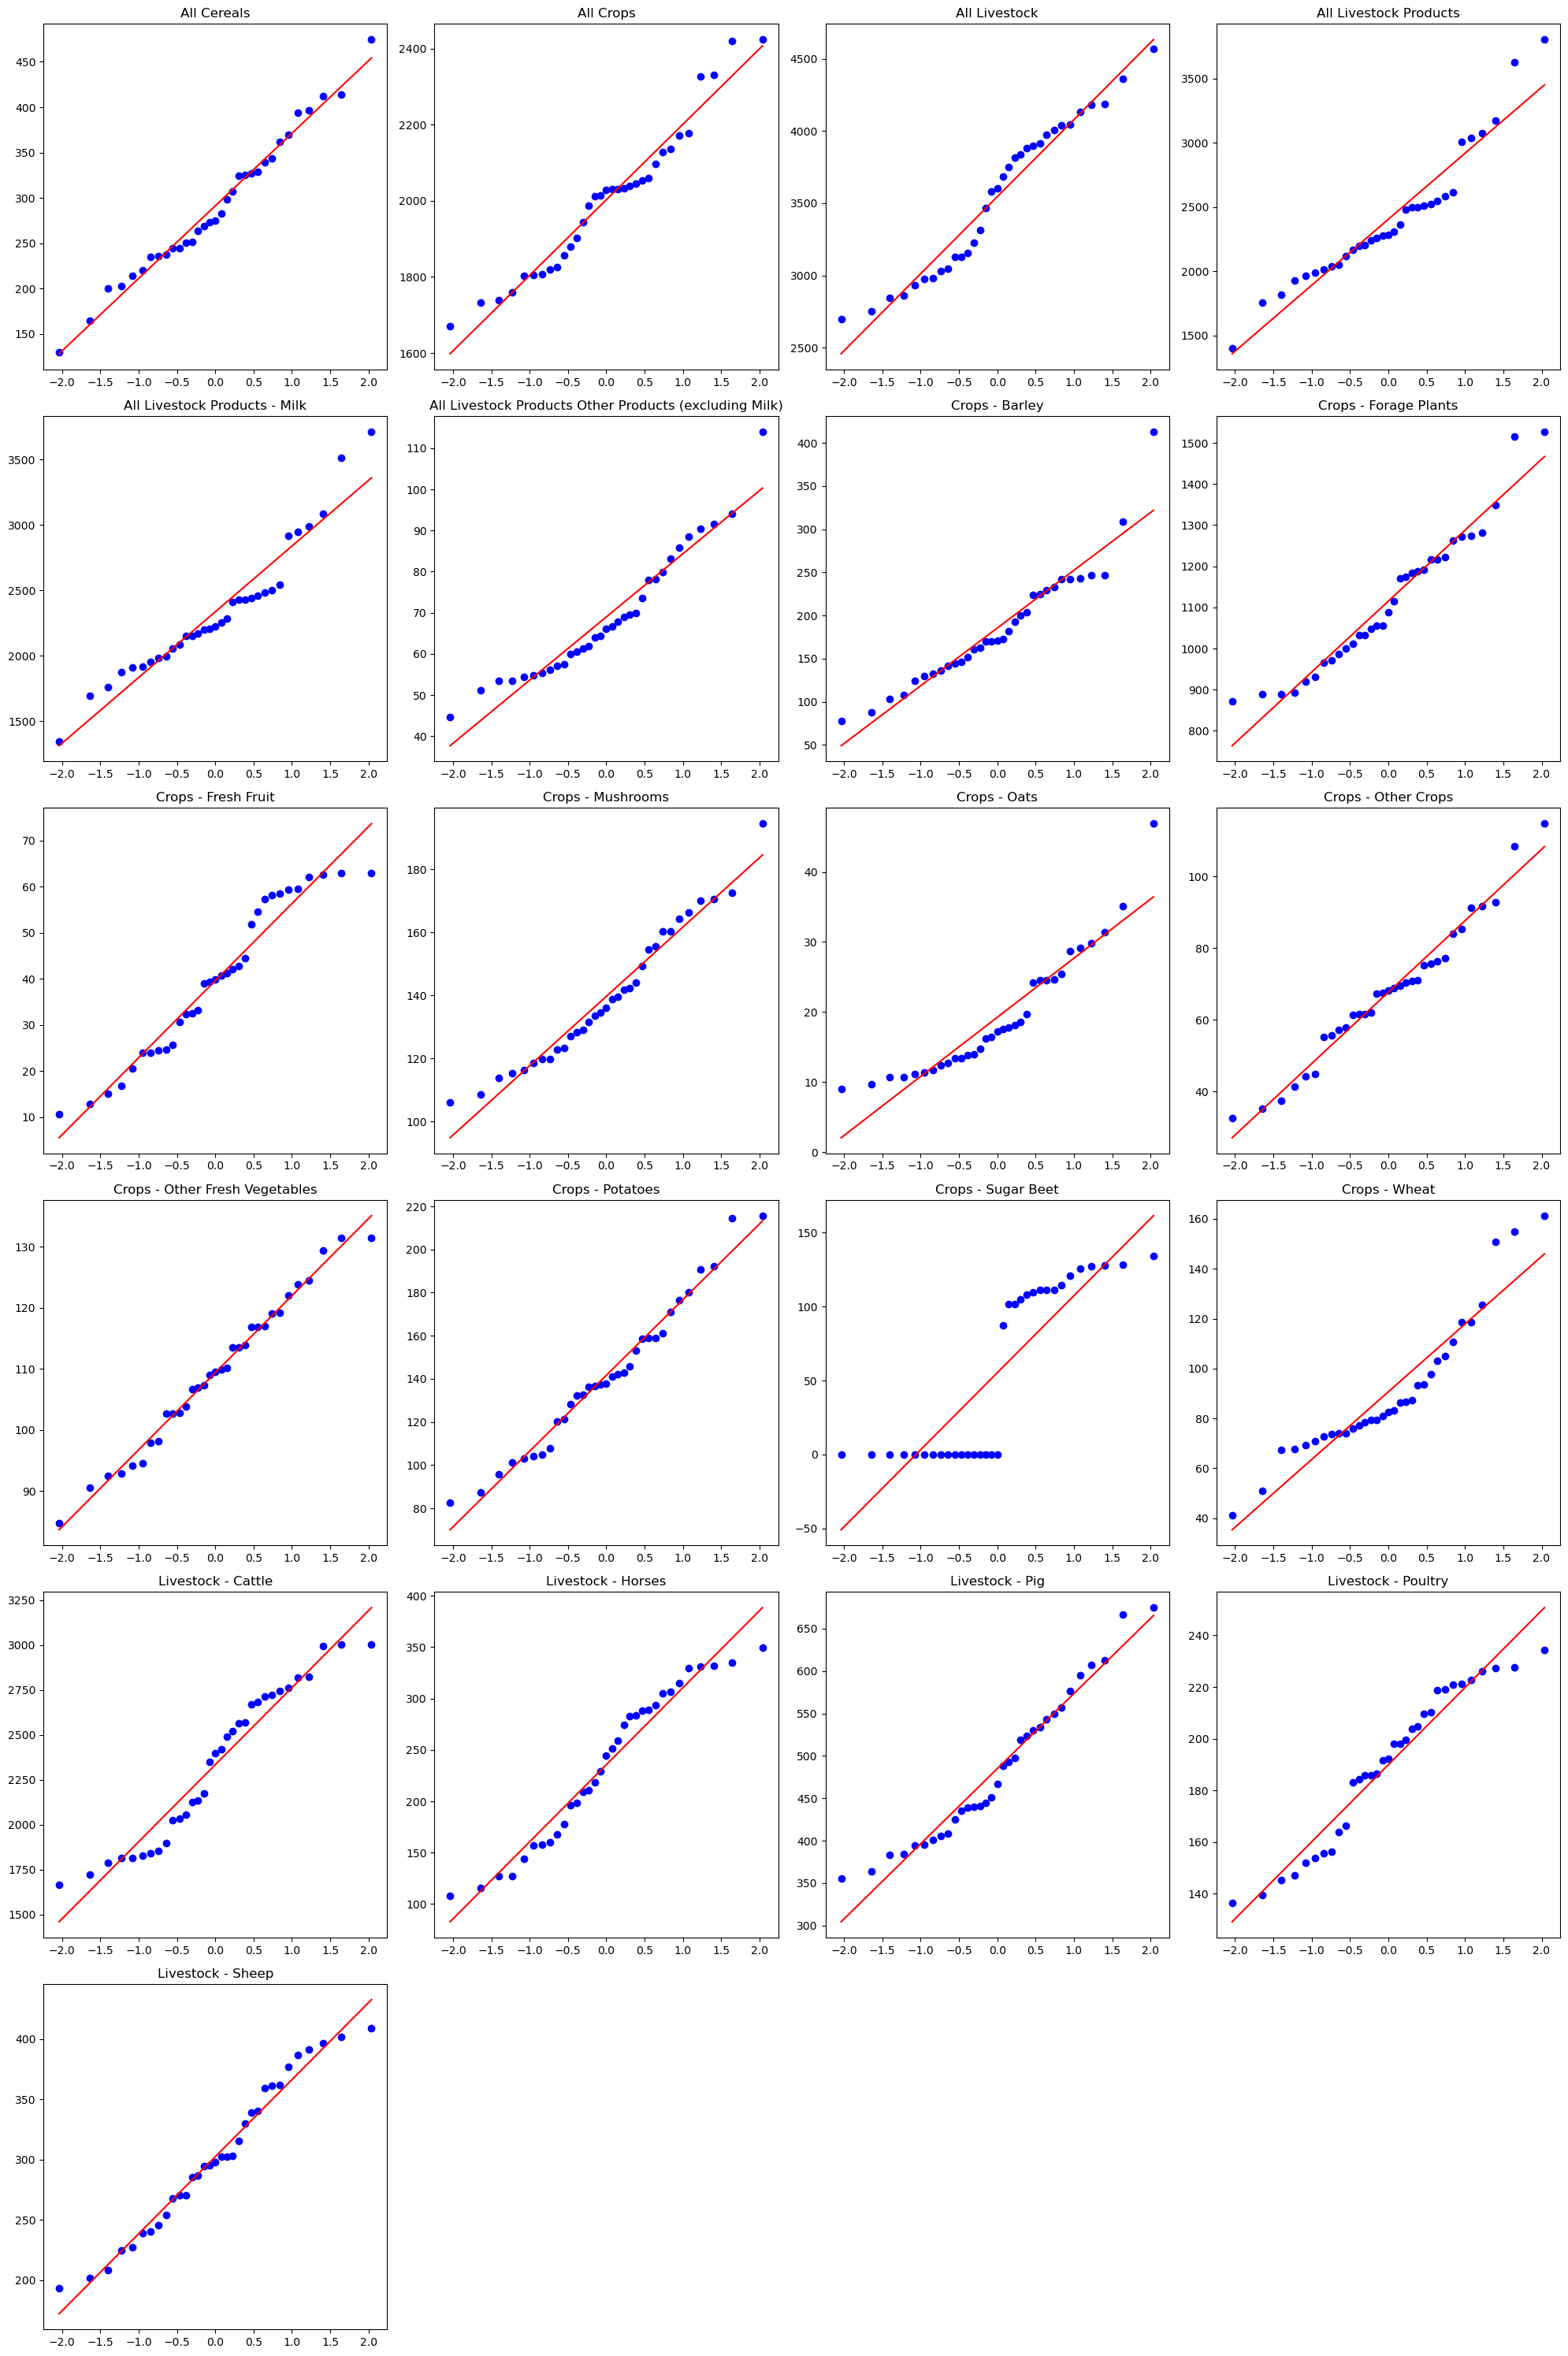

In [80]:
# Create Q-Q plots in a single subplot to compare easily
num_labels = len(grouped)
cols = 4
rows = (num_labels + cols - 1) // cols 

plt.figure(figsize=(20, 5 * rows))
for i, (label, group) in enumerate(grouped):
    plt.subplot(rows, cols, i + 1)
    stats.probplot(group['Adjusted Value'], dist="norm", plot=plt)
    plt.title(label)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Zach (2020). How to Create a Q-Q Plot in Python. [online] Statology. Available at: https://www.statology.org/q-q-plot-python/.

In [81]:
# Add a column to indicate if the data is normally distributed 
normality_results_df['Normally Distributed'] = normality_results_df['p-value'] > 0.05

In [82]:
# Display the results of the Shapiro-Wilk test
normality_results_df

,Statistic Label,Shapiro-Wilk Statistic,p-value,Normally Distributed
0,All Cereals,0.984424,0.905509,True
1,All Crops,0.953463,0.167810,True
2,All Livestock,0.945781,0.100161,True
3,All Livestock Products,0.931484,0.038580,False
4,All Livestock Products - Milk,0.934643,0.047533,False
5,All Livestock Products Other Products (excludi...,0.933240,0.043319,False
6,Crops - Barley,0.923332,0.022684,False
7,Crops - Forage Plants,0.944443,0.091539,True
8,Crops - Fresh Fruit,0.933507,0.044090,False
9,Crops - Mushrooms,0.960026,0.258929,True


In [83]:
aggregated_data_no_outliers = no_outliers_df.groupby('Year')['Adjusted Value'].sum().reset_index()

Shapiro-Wilk Statistic: 0.9641077518463135, p-value: 0.33627453446388245
Data is normally distributed


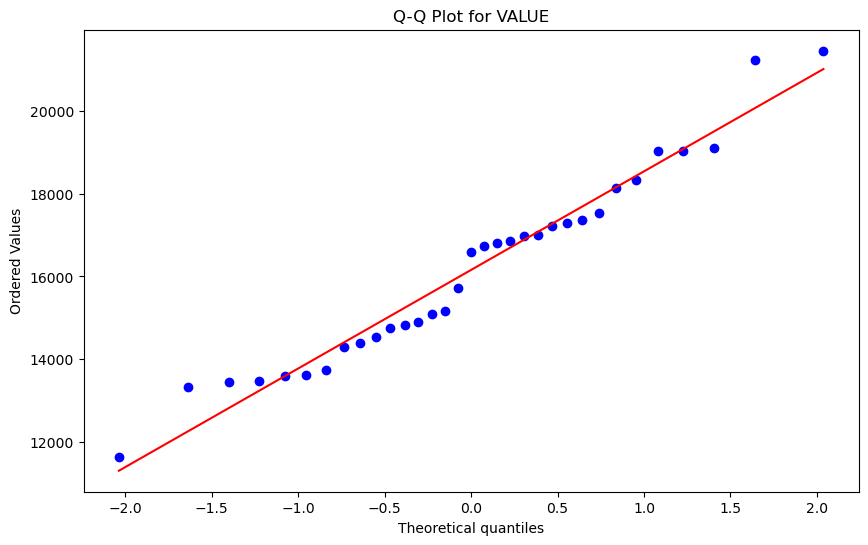

In [84]:
# function to check normality for all livestock value
def check_normality(data):
    # Shapiro-Wilk test
    stat, p_value = stats.shapiro(data)
    return stat, p_value

# Perform normality test
stat, p_value = check_normality(aggregated_data_no_outliers['Adjusted Value'])

# Print the Shapiro-Wilk test results
print(f"Shapiro-Wilk Statistic: {stat}, p-value: {p_value}")

# check if normally distributed
normally_distributed = p_value > 0.05

# Print the result
print(f"Data is {'normally distributed' if normally_distributed else 'not normally distributed'}")

# Create Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(aggregated_data_no_outliers['Adjusted Value'], dist="norm", plot=plt)
plt.title('Q-Q Plot for VALUE')
plt.show()

## Let's Focus on Different Regions in Ireland

In [85]:
#dataset taken from CSO's Open Data Platform (Data.cso.ie, 2020)
agri_2010_df = pd.read_csv("2010-23_agriculture.csv")

In [86]:
agri_2010_df.head()

,Statistic Label,Year,Region,UNIT,VALUE
0,All Livestock,2010,State,Euro Million,2259.6
1,All Livestock,2010,Northern and Western,Euro Million,702.0
2,All Livestock,2010,Border,Euro Million,394.7
3,All Livestock,2010,West,Euro Million,307.3
4,All Livestock,2010,Southern,Euro Million,1055.7


In [87]:
agri_2010_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  5863 non-null   object 
 1   Year             5863 non-null   int64  
 2   Region           5863 non-null   object 
 3   UNIT             5863 non-null   object 
 4   VALUE            5863 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 229.2+ KB


In [88]:
agri_2010_df.describe(include=object)

,Statistic Label,Region,UNIT
count,5863,5863,5863
unique,41,11,1
top,All Livestock,State,Euro Million
freq,143,533,5863


In [89]:
# CPI values for Ireland from 1990 to 2023 (CSO office)
cpi_values = {
    1990: 52.6, 1991: 55.1, 1992: 56.9, 1993: 58.6, 1994: 59.5,
    1995: 60.5, 1996: 61.8, 1997: 63.6, 1998: 64.9, 1999: 65.5,
    2000: 67.3, 2001: 69.5, 2002: 70.8, 2003: 72.2, 2004: 74.2,
    2005: 76.4, 2006: 78.7, 2007: 81.1, 2008: 83.4, 2009: 82.5,
    2010: 82.2, 2011: 84.5, 2012: 85.1, 2013: 85.4, 2014: 85.7,
    2015: 85.5, 2016: 85.8, 2017: 86.8, 2018: 87.7, 2019: 88.6,
    2020: 89.2, 2021: 91.5, 2022: 97.0, 2023: 100.0
}

# Convert the dataset values to a common year
base_year = 2023
base_cpi = cpi_values[base_year]

# Adjust the values for inflation
def adjust_for_inflation(row):
    year = row['Year']
    nominal_value = row['VALUE']
    cpi_year = cpi_values.get(year, base_cpi)
    adjusted_value = nominal_value * (base_cpi / cpi_year)
    return adjusted_value

# Apply the inflation adjustment and create a new column "Adjusted Value"
agri_2010_df['Adjusted Value'] = agri_2010_df.apply(adjust_for_inflation, axis=1)

# Display the first few rows 
agri_2010_df.head()

,Statistic Label,Year,Region,UNIT,VALUE,Adjusted Value
0,All Livestock,2010,State,Euro Million,2259.6,2748.905109
1,All Livestock,2010,Northern and Western,Euro Million,702.0,854.014599
2,All Livestock,2010,Border,Euro Million,394.7,480.170316
3,All Livestock,2010,West,Euro Million,307.3,373.844282
4,All Livestock,2010,Southern,Euro Million,1055.7,1284.306569


C:\Users\a-ldrumm\AppData\Local\Temp\ipykernel_30576\1856535037.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\a-ldrumm\AppData\Local\Temp\ipykernel_30576\1856535037.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator



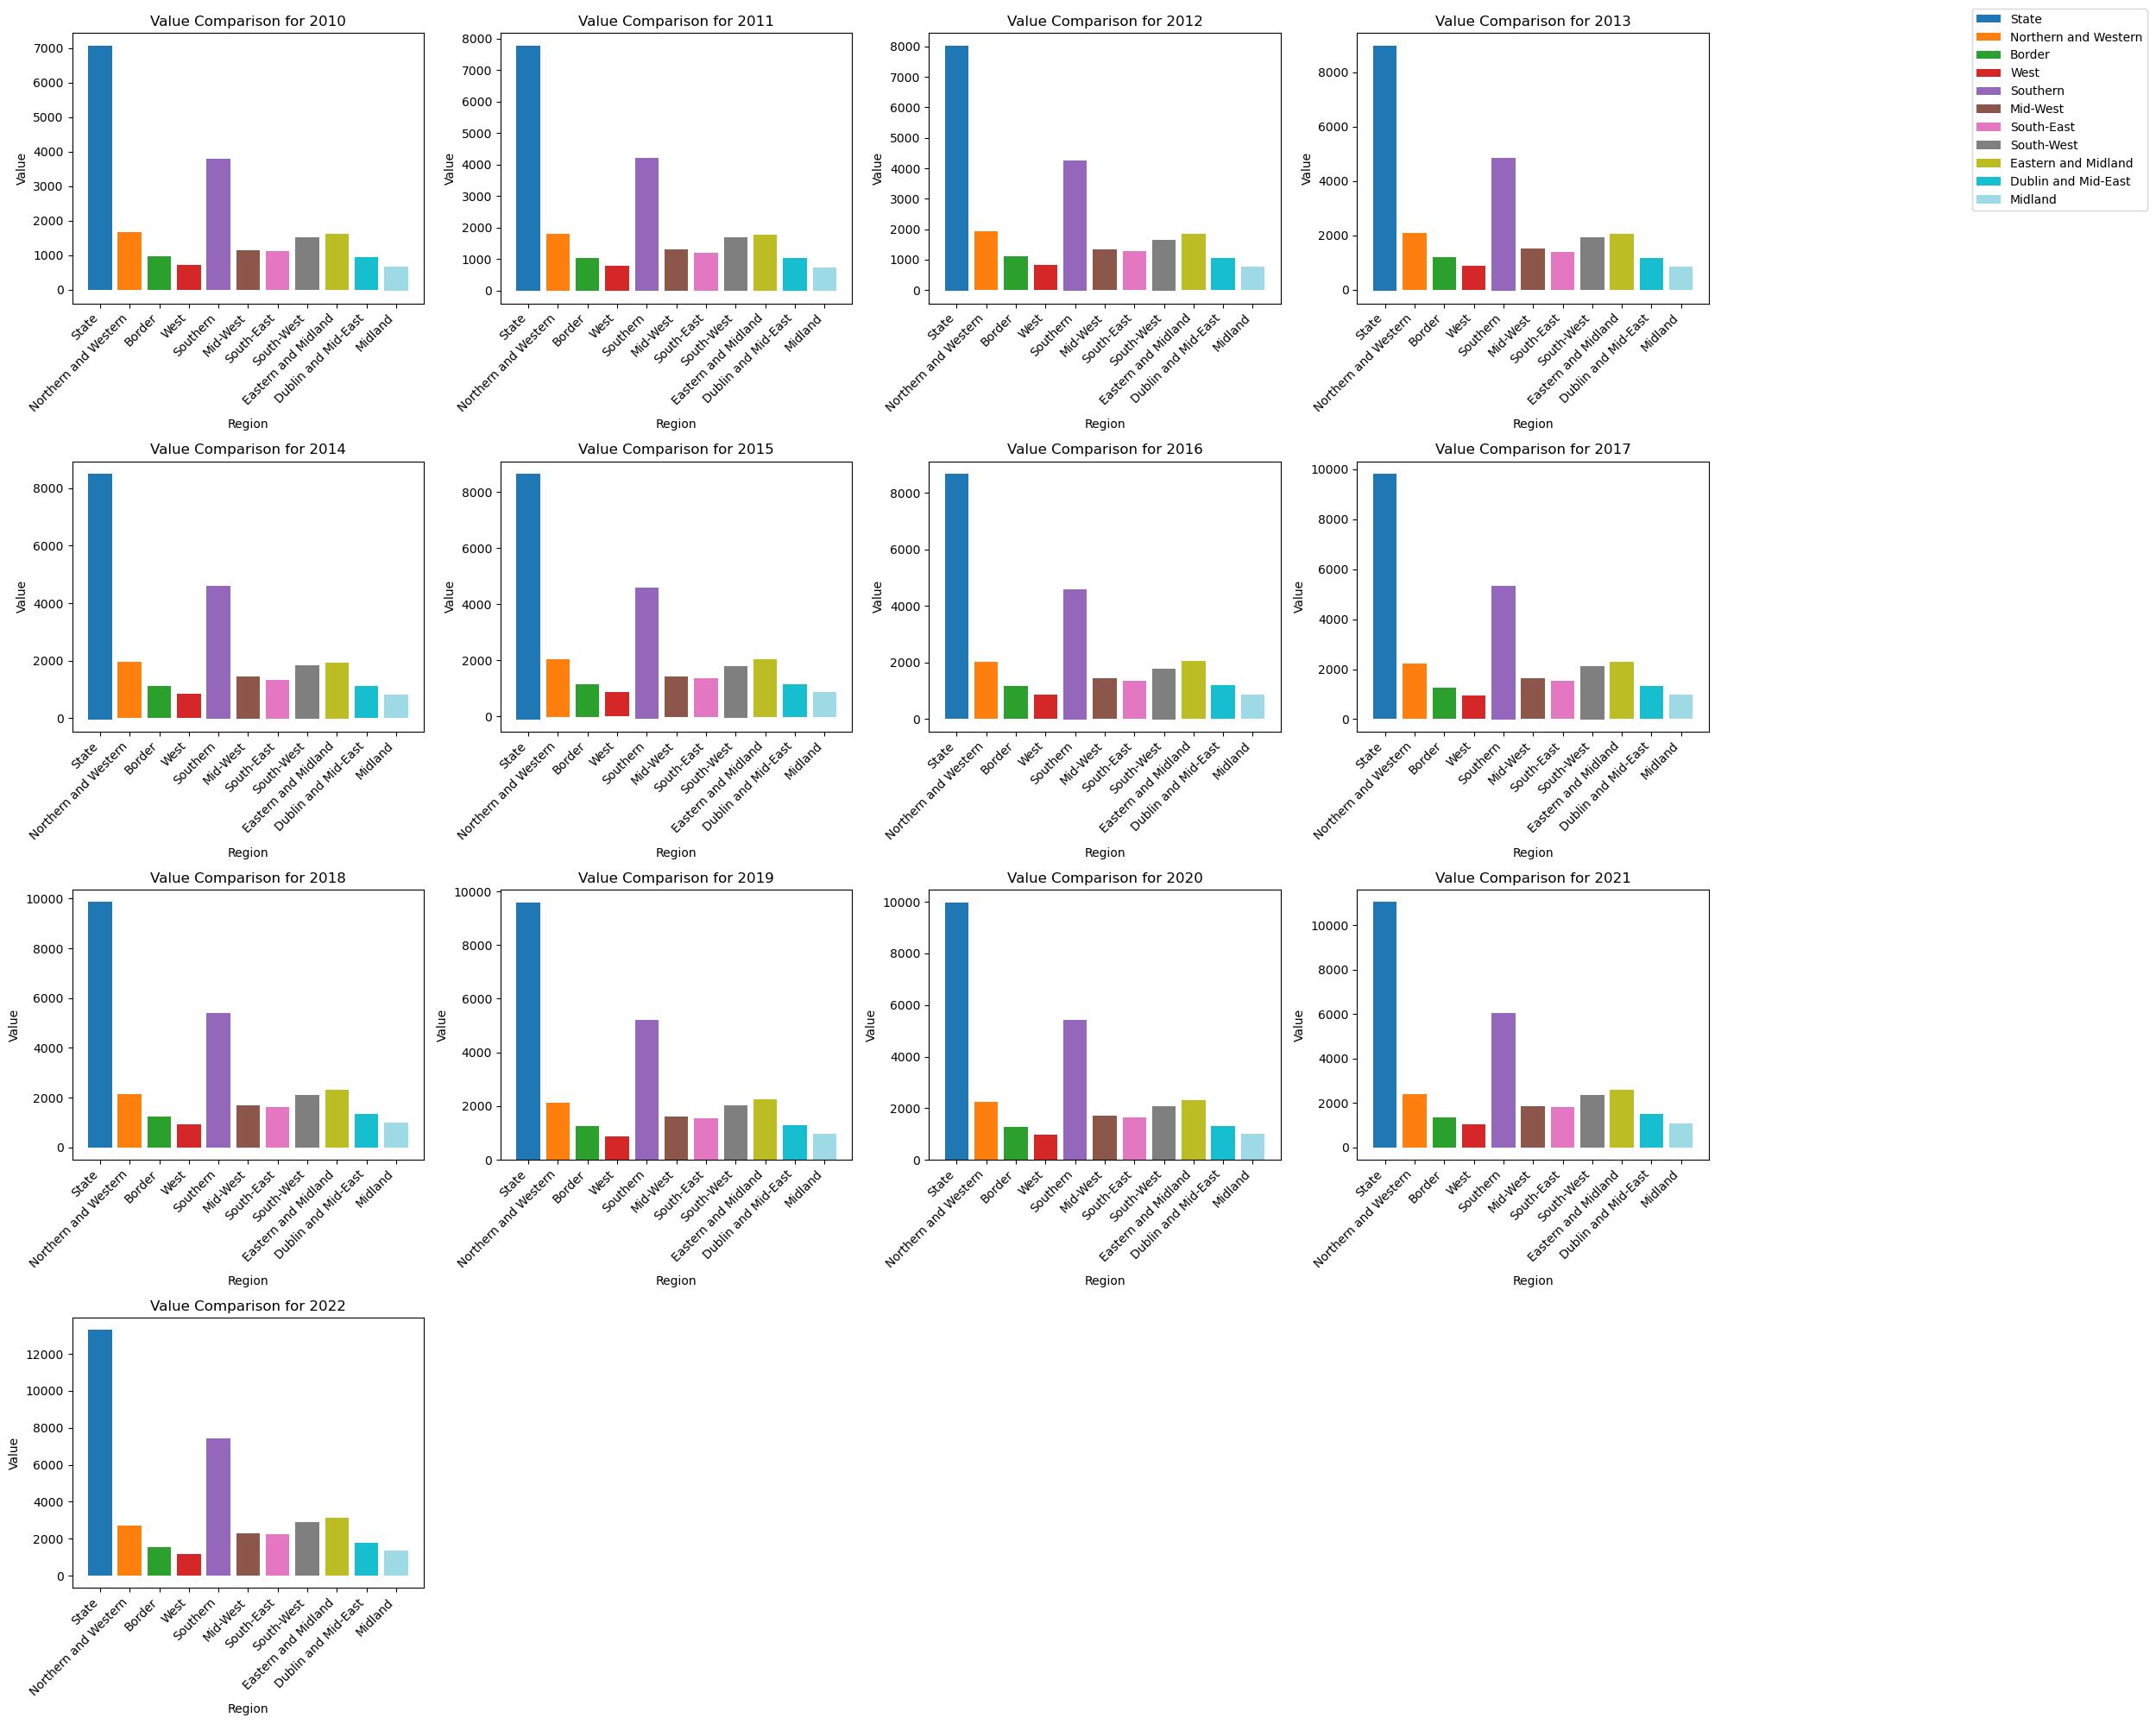

In [90]:
# Get a list of unique years
unique_years = agri_2010_df['Year'].unique()
unique_years.sort() 

# Extract unique regions and assign colors
unique_regions = agri_2010_df['Region'].unique()
cmap = get_cmap('tab20')  
norm = Normalize(vmin=0, vmax=len(unique_regions) - 1)
region_colors = {region: cmap(norm(i)) for i, region in enumerate(unique_regions)}

# Determine the layout of the grid
num_years = len(unique_years)
cols = int(np.ceil(np.sqrt(num_years)))  
rows = int(np.ceil(num_years / cols))

# Set up the plotting area
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 5, rows * 5), squeeze=False)

# Flatten to simplify indexing
axes = axes.flatten()  

# Plot each year's data as a separate bar chart
for idx, year in enumerate(unique_years):
    # Filter the data for the year
    year_data = agri_2010_df[agri_2010_df['Year'] == year]
    
    # Create the bar chart with color mapping
    bars = [axes[idx].bar(region, value, color=region_colors[region]) for region, value in zip(year_data['Region'], year_data['Adjusted Value'])]
    
    axes[idx].set_title(f'Value Comparison for {year}')
    axes[idx].set_xlabel('Region')
    axes[idx].set_ylabel('Value')
    axes[idx].set_xticklabels(year_data['Region'], rotation=45, ha='right')  # Rotate labels for readability
  
#create legend
handles = [bars[i][0] for i in range(len(unique_regions))]
labels = list(unique_regions)
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.25, 1))

# Hide unused axes if there are any
for ax in axes[idx + 1:]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

matplotlib.org. (2012). matplotlib.pyplot.subplots — Matplotlib 3.6.0 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html.

Mckinney, W. (2013). Python for data analysis. Beijing: O’reilly

In [91]:
#check categories
categories = agri_2010_df['Statistic Label'].unique()
print(categories)

['All Livestock' 'Cattle' 'Pigs' 'Sheep' 'Horses' 'Poultry'
 'All Livestock Products' 'Milk' 'Other Products' 'All Crops' 'Cereals'
 'Potatoes' 'Forage Plants - Output' 'Vegetables' 'Fresh Fruit'
 'Other Crops' 'Goods Output at Producer Prices' 'Contract Work - Output'
 'Subsidies on Products' 'Taxes on Products' 'Net Subsidies on Products'
 'Agricultural Output at Basic Prices' 'Intermediate Consumption'
 'Feedingstuffs' 'Fertilisers'
 'Financial Intermediation Services Indirectly Measured (FISIM)' 'Seeds'
 'Maintenance and Repairs' 'Other Goods and Services'
 'Crop Protection Products' 'Veterinary Expenses' 'Energy and Lubricants'
 'Forage Plants - Consumption' 'Contract Work - Expenditure'
 'Gross Value Added at Basic Prices' 'Fixed Capital Consumption'
 'Net Value Added at Basic Prices'
 'Net Subsidies on Production: Other Subsidies Less Taxes on Production'
 'Factor Income' 'Compensation of Employees' 'Operating Surplus']


In [92]:
categories_to_filter =['All Livestock', 'Cattle' ,'Pigs', 'Sheep' ,'Horses', 'Poultry',
 'All Livestock Products', 'Milk' 'Other Products', 'All Crops' ,'Cereals',
 'Potatoes', 'Forage Plants - Output' ,'Vegetables', 'Fresh Fruit',
 'Other Crops' ]

In [93]:
filtered_agri_2010_df = filter_categories(agri_2010_df, categories)

In [94]:
#I will use this for my dashboard
filtered_agri_2010_df.to_csv("dashboard_data.csv")

In [95]:
#function to highlight max and min
def highlight_min_max(s):
    '''
    Highlight the minimum values in red and maximum values in green.
    '''
    temp_s = s.drop('Total', errors='ignore')
    is_min = s == s.min()
    is_max = s == s.max()
    return ['background-color: red' if v else 'background-color: green' if w else '' 
            for v, w in zip(is_min, is_max)]

In [96]:
# regions to remove
regions_to_remove = ['State', "Southern",'Northern and Western','Eastern and Midland']

# Drop rows 
df_dropped = filtered_agri_2010_df[~filtered_agri_2010_df['Region'].isin(regions_to_remove)]

# Group total value by region for each category
total_value = df_dropped.groupby(['Region', 'Statistic Label'])['Adjusted Value'].sum().unstack()


total_value['Total'] = total_value.sum(axis=1)


# Apply the highlight function across each column
styled = total_value.style.apply(highlight_min_max, axis=0).format("{:,.0f}")

# Display the styled DataFrame
styled

Statistic Label,Agricultural Output at Basic Prices,All Crops,All Livestock,All Livestock Products,Cattle,Cereals,Compensation of Employees,Contract Work - Expenditure,Contract Work - Output,Crop Protection Products,Energy and Lubricants,Factor Income,Feedingstuffs,Fertilisers,Financial Intermediation Services Indirectly Measured (FISIM),Fixed Capital Consumption,Forage Plants - Consumption,Forage Plants - Output,Fresh Fruit,Goods Output at Producer Prices,Gross Value Added at Basic Prices,Horses,Intermediate Consumption,Maintenance and Repairs,Milk,Net Subsidies on Production: Other Subsidies Less Taxes on Production,Net Subsidies on Products,Net Value Added at Basic Prices,Operating Surplus,Other Crops,Other Goods and Services,Other Products,Pigs,Potatoes,Poultry,Seeds,Sheep,Subsidies on Products,Taxes on Products,Vegetables,Veterinary Expenses,Total
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Border,"15,636","3,449","8,302","3,190","4,049",86,"1,218",634,634,46,859,"6,691","4,632",860,152,"1,422","1,912","1,921",33,"14,941","4,279",84,"11,357",857,"2,621","3,834",61,"2,857","5,473",33,819,569,"1,766",202,"1,534",87,869,159,98,"1,173",499,"109,900"
Dublin and Mid-East,"16,228","6,664","5,413","3,389","3,331","1,635","1,332",753,753,377,813,"6,077","1,772","1,240",279,"2,539","2,349","2,358",349,"15,467","6,199",968,"10,029",902,"3,240","2,417",8,"3,660","4,745",244,852,149,428,"1,031",119,238,568,87,79,"1,048",456,"110,585"
Mid-West,"20,438","3,478","8,354","7,563","6,303",391,"1,353","1,060","1,060",93,"1,118","8,834","3,840","1,406",175,"1,606","2,666","2,681",41,"19,395","6,554",638,"13,884","1,254","7,541","3,886",-17,"4,948","7,482",117,"1,355",21,"1,000",58,252,131,161,145,162,190,787,"142,404"
Midland,"12,034","2,557","6,049","2,822","4,205",480,826,581,581,124,821,"3,320","2,242",935,231,"2,118","1,791","1,799",37,"11,428","3,063",302,"8,971",765,"2,791","2,376",26,945,"2,495",67,911,30,"1,281",43,27,96,235,115,89,132,476,"80,214"
South-East,"19,474","5,381","6,718","6,467","4,440","1,360","1,351",929,929,348,919,"7,331","2,970","1,703",261,"2,363","2,575","2,582",191,"18,567","6,631",654,"12,843","1,074","6,406","3,063",-22,"4,268","5,980",519,"1,187",61,"1,113",399,131,232,381,110,132,331,646,"132,996"
South-West,"25,788","4,425","8,284","11,962","5,585",683,"1,589","1,212","1,212",116,"1,154","11,942","4,392","1,793",246,"2,199","3,076","3,083",83,"24,672","9,673",535,"16,115","1,415","11,807","4,468",-95,"7,474","10,354",238,"1,554",155,"1,427",180,200,180,537,117,212,158,977,"181,179"
West,"11,746","2,682","6,633","1,596","5,042",66,"1,341",708,708,32,742,"7,146","1,777",820,67,613,"2,228","2,238",15,"10,910","3,219",309,"8,526",764,"1,542","4,540",127,"2,606","5,805",65,754,53,212,17,37,86,"1,032",205,78,280,549,"87,917"


C:\Users\a-ldrumm\AppData\Local\Temp\ipykernel_30576\3283658010.py:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



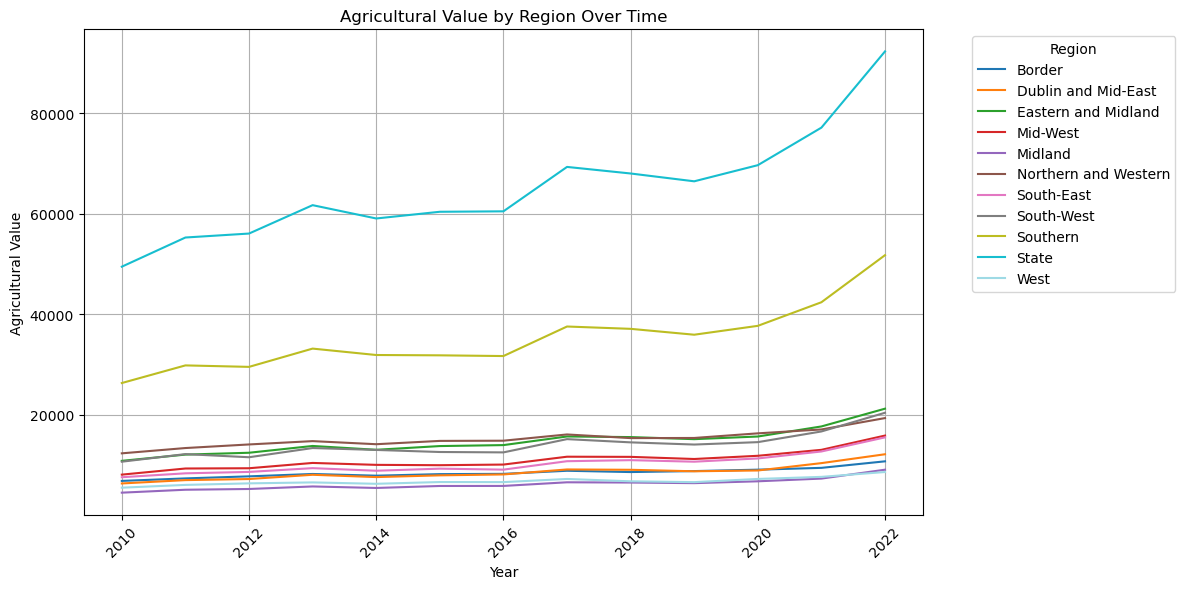

In [97]:
# Group the data by 'Year' and 'Region' and take the sum of the value
grouped_data = agri_2010_df.groupby(['Year', 'Region'])['Adjusted Value'].sum().reset_index()

# Extract regions and assign colors
unique_regions = grouped_data['Region'].unique()
cmap = get_cmap('tab20')  # Colormap with enough colors for distinct regions
norm = Normalize(vmin=0, vmax=len(unique_regions) - 1)
region_colors = {region: cmap(norm(i)) for i, region in enumerate(unique_regions)}

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the data for each Region
for region in unique_regions:
    region_data = grouped_data[grouped_data['Region'] == region]
    plt.plot(region_data['Year'], region_data['Adjusted Value'], color=region_colors[region], label=region)

# Set title and labels
plt.title('Agricultural Value by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Agricultural Value')

# Rotate x-axis labels 
plt.xticks(rotation=45)

# Include grid for easy reading 
plt.grid(True)

# Include legend
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\a-ldrumm\AppData\Local\Temp\ipykernel_30576\3081212393.py:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



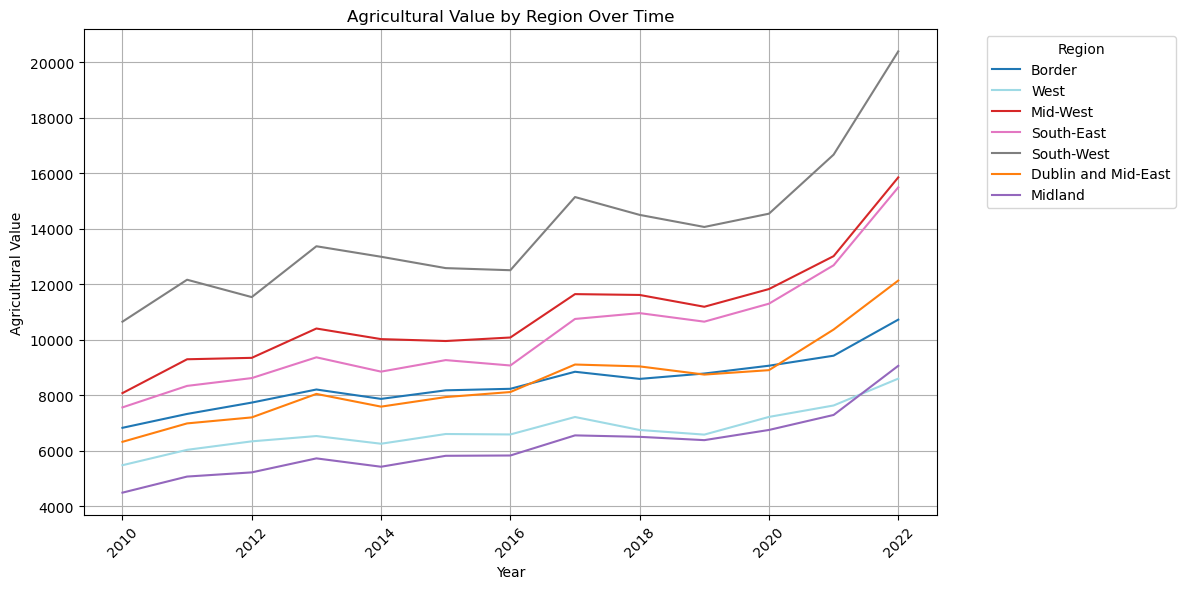

In [98]:
# Define a list of NUTS3 regions
regions_to_plot = ['Border', 'West', 'Mid-West','South-East','South-West','Dublin and Mid-East','Midland'] 

# Group the data by 'Year' and 'Region' and take the sum of value
grouped_data = agri_2010_df.groupby(['Year', 'Region'])['Adjusted Value'].sum().reset_index()

# Extract unique regions and assign colors
unique_regions = grouped_data['Region'].unique()
cmap = get_cmap('tab20')  # Colormap with enough colors for distinct regions
norm = Normalize(vmin=0, vmax=len(unique_regions) - 1)
region_colors = {region: cmap(norm(i)) for i, region in enumerate(unique_regions)}

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the data for each Region
for region in regions_to_plot:
    region_data = grouped_data[grouped_data['Region'] == region]
    plt.plot(region_data['Year'], region_data['Adjusted Value'], color=region_colors[region], label=region)

# Set title and labels
plt.title('Agricultural Value by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Agricultural Value')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Include grid for easy reading 
plt.grid(True)

# Include legend
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Why is agriculture value higher in specific regions, is there any notable correlations? Is there more farms in these regions and are they bigger?

In [99]:
 #after observing my dataset I've decided I want to narrow my study to livestock and crop production only, create a list of 'Statistic Labels' to filter
categories= [
  'All Livestock' ,'Cattle', 'Pigs', 'Sheep', 'Horses', 'Poultry',
 'All Livestock Products', 'Milk', 'Other Products', 'All Crops', 'Cereals',
 'Potatoes', 'Forage Plants - Output', 'Vegetables', 'Fresh Fruit',
 'Other Crops' ]

In [100]:
regions = filter_categories(df_dropped, categories)

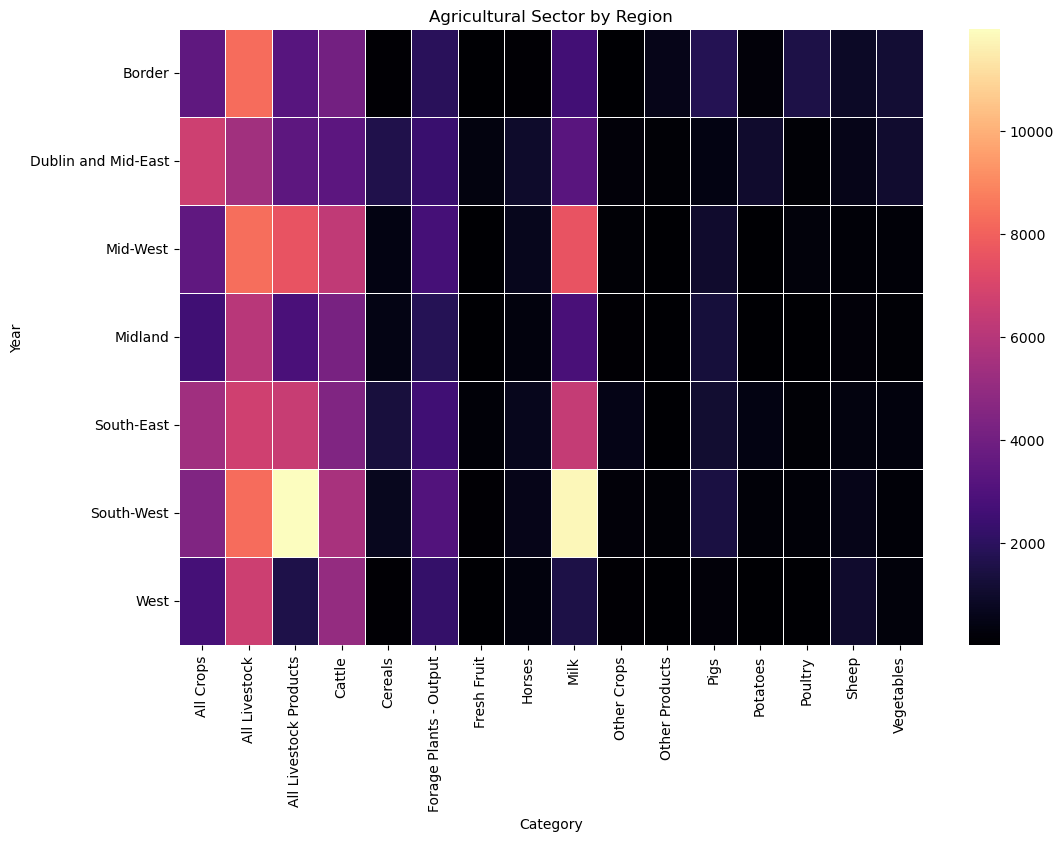

In [101]:
# Pivot the DataFrame to create a heatmap to visualise the change in total visitors over time
heatmap_data = regions.pivot_table(index='Region', columns='Statistic Label', values='Adjusted Value', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='magma', annot=False, fmt='d', linewidths=.5)
plt.title('Agricultural Sector by Region')
plt.xlabel('Category')
plt.ylabel('Year')
plt.show()

# Let's Visualise this on a Map

In [102]:
# Load the shapefile
gdf = gpd.read_file('NUTS3.shp')

# Filter the data to include only the chosen regions
data = agri_2010_df[~agri_2010_df['Region'].isin(['State', "Southern",'Northern and Western'])]
total_data = data.groupby('Region')['Adjusted Value'].sum().reset_index()

total_data['Region'] = total_data['Region'].replace({'Dublin and Mid-East': 'Mid-East', 'Midland': 'Midlands'})

# Ensure the column names match for merging
print(gdf.columns)  # Check column names in the shapefile
print(total_data.columns)  # Check column names in the dataset

Index(['NUTS1', 'NUTS1NAME', 'NUTS2', 'NUTS2NAME', 'NUTS3', 'NUTS3NAME',
       'GUID', 'geometry'],
      dtype='object')
Index(['Region', 'Adjusted Value'], dtype='object')


In [103]:
total_data.head(10)

,Region,Adjusted Value
0,Border,109899.644565
1,Mid-East,110584.675976
2,Eastern and Midland,190797.430893
3,Mid-West,142403.819768
4,Midlands,80213.704686
5,South-East,132996.439978
6,South-West,181178.655031
7,West,87917.343066


In [104]:
# Simplify geometries to reduce memory usage
gdf['geometry'] = gdf['geometry'].simplify(tolerance=0.01, preserve_topology=True)

# Merge the dataset with the shapefile
merged = gdf.merge(total_data, left_on='NUTS3NAME', right_on='Region')

In [105]:
# Create a folium map centered around Ireland
m = folium.Map(location=[53.1424, -7.6921], zoom_start=6)

# Add Choropleth to the folium map
Choropleth(
    geo_data=merged,
    name='choropleth',
    data=merged,
    columns=['NUTS3NAME', 'Adjusted Value'],
    key_on='feature.properties.NUTS3NAME',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Euro Million'
).add_to(m)

# Add GeoJson tooltips
folium.GeoJson(
    merged,
    style_function=lambda x: {
        'fillColor': '#ffffff',
        'color': 'black',
        'fillOpacity': 0,
        'weight': 0.1
    },
    tooltip=GeoJsonTooltip(
        fields=['NUTS3NAME', 'Adjusted Value'],
        aliases=['Region:', 'Value:'],
        localize=True
    )
).add_to(m)


# Save map as html
m.save('map.html')

# Inferential Statistics

Confidence Inverval for the Population Proportion of Annual Potato Production out of Total Crop Production in Ireland

In [108]:
# Filter data for crop production
crop_production = most_popular[(most_popular['Statistic Label'] == 'All Crops')]['Adjusted Value'].sum()

# Calculate the total production
total_production = most_popular[most_popular['Statistic Label'].isin(['All Crops', 'All Livestock'])]

production=total_production['Adjusted Value'].sum()

# Calculate the sample proportion of all crop production
p_hat = crop_production / production

# Sample size: number of years in the dataset
n =agri_df['Year'].nunique()  # Make sure 'Year' is the correct column name

# Calculate the 95% confidence interval for the proportion
z_star = norm.ppf(0.975)  # Z-score for 95% CI
margin_of_error = z_star * np.sqrt((p_hat * (1 - p_hat)) / n)

lower_bound = p_hat - margin_of_error
upper_bound = p_hat + margin_of_error

print("95% Confidence Interval for the proportion of crop production: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

95% Confidence Interval for the proportion of crop production: [0.1996, 0.5225]


In [109]:
# statistic labels to loop through
statistic_labels = [
    'All Cereals', 'Crops - Barley', 'Crops - Wheat', 'Crops - Oats',
    'Crops - Potatoes', 'Crops - Sugar Beet', 'Crops - Mushrooms',
    'Crops - Other Fresh Vegetables', 'Crops - Fresh Fruit', 
    'Crops - Other Crops', 'Crops - Forage Plants'
]

In [110]:
total_production.describe()

,Year,VALUE,Adjusted Value
count,68.000000,68.000000,68.000000
mean,2006.500000,2147.095706,2801.322190
std,9.883652,832.336116,889.417785
min,1990.000000,1101.700000,1670.181818
25%,1998.000000,1440.500000,2030.193790
50%,2006.500000,2119.619277,2695.713800
75%,2015.000000,2380.725000,3622.662414
max,2023.000000,4570.987090,4683.764646


In [111]:
# Calculate the total production
total_production = most_popular[most_popular['Statistic Label'].isin(['All Crops', 'All Livestock'])]['Adjusted Value'].sum()

# Sample size
n = most_popular['Year'].nunique()

# Create a list to store the results
results = []

# Loop through each statistic label
for label in statistic_labels:
    # Filter data for the current label
    crop_production = most_popular[most_popular['Statistic Label'] == label]['Adjusted Value'].sum()
    
    # Calculate the sample proportion of crop production
    p_hat = crop_production / total_production
    
    # Wilson score interval calculation
    z_star = norm.ppf(0.975)  # Z-score for 95% CI
    center_adjusted_probability = p_hat + z_star**2 / (2 * n)
    adjusted_standard_deviation = np.sqrt((p_hat * (1 - p_hat) + z_star**2 / (4 * n)) / n)
    lower_bound = (center_adjusted_probability - z_star * adjusted_standard_deviation) / (1 + z_star**2 / n)
    upper_bound = (center_adjusted_probability + z_star * adjusted_standard_deviation) / (1 + z_star**2 / n)
    
    # Calculate the width of the confidence interval
    interval_width = upper_bound - lower_bound
    
    # Append the results to the list
    results.append({
        'Statistic Label': label,
        'Proportion': p_hat,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Interval Width': interval_width
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Rank by width of the confidence interval
sorted_results_df = results_df.sort_values(by='Interval Width')

# Style
styled_df = sorted_results_df.style.set_properties(**{
    'background-color': '#f9f9f9',
    'color': '#000000',
    'border-color': '#dddddd',
    'border-style': 'solid',
    'border-width': '1px'
}).format({
    'Proportion': '{:.4f}',
    'Lower Bound': '{:.4f}',
    'Upper Bound': '{:.4f}',
    'Interval Width': '{:.4f}'
}).set_caption("95% Confidence Intervals for Various Crop Productions Sorted by Interval Width")

# Display the styled DataFrame
styled_df

,Statistic Label,Proportion,Lower Bound,Upper Bound,Interval Width
3,Crops - Oats,0.0037,0.0001,0.1080,0.1079
8,Crops - Fresh Fruit,0.0072,0.0004,0.1140,0.1136
5,Crops - Sugar Beet,0.0096,0.0007,0.1180,0.1173
9,Crops - Other Crops,0.0124,0.0011,0.1227,0.1216
2,Crops - Wheat,0.0165,0.0019,0.1293,0.1274
7,Crops - Other Fresh Vegetables,0.0197,0.0026,0.1343,0.1317
6,Crops - Mushrooms,0.0249,0.0039,0.1423,0.1384
4,Crops - Potatoes,0.0254,0.0041,0.1431,0.1391
1,Crops - Barley,0.0348,0.0069,0.1571,0.1501
0,All Cereals,0.0542,0.0143,0.1846,0.1703


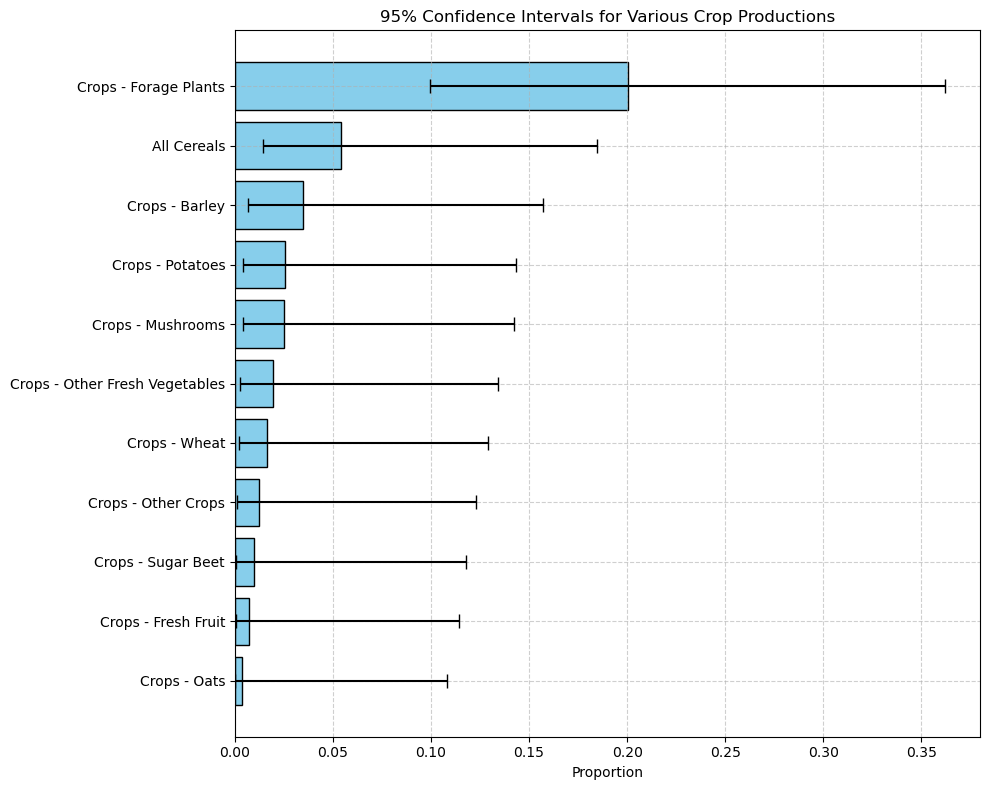

In [112]:
# Extract necessary data
labels = sorted_results_df['Statistic Label']
proportions = sorted_results_df['Proportion']
lower_bounds = sorted_results_df['Lower Bound']
upper_bounds = sorted_results_df['Upper Bound']
interval_widths = sorted_results_df['Interval Width']

# Calculate error margins for error bars
error = [proportions - lower_bounds, upper_bounds - proportions]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(labels, proportions, xerr=error, capsize=5, color='skyblue', edgecolor='black')
ax.set_xlabel('Proportion')
ax.set_title('95% Confidence Intervals for Various Crop Productions')

# Add a grid
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

#### Confidence Inverval for the Population Proportion of Agriculture Output Value Originating in South-West of Ireland

In [113]:
# Filter data for South West
south_west_value = df_dropped[(df_dropped['Region'] == 'South-West')]['Adjusted Value'].sum()
total_value =  df_dropped['Adjusted Value'].sum()

# Calculate the sample proportion of potato production
p_hat = south_west_value / total_value

# Sample size: number of years in the dataset
n =agri_2010_df['Year'].nunique()  # Make sure 'Year' is the correct column name

# Calculate the 95% confidence interval for the proportion
z_star = norm.ppf(0.975)  # Z-score for 95% CI
margin_of_error = z_star * np.sqrt((p_hat * (1 - p_hat)) / n)

lower_bound = p_hat - margin_of_error
upper_bound = p_hat + margin_of_error

print("95% Confidence Interval for the proportion of crop production: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

95% Confidence Interval for the proportion of crop production: [-0.0087, 0.4374]
